# Introduction 🙌

Hello🥰
We are **iris.bjir** whose members are:

*   Dhia Alif Tajriyaani Azhar
*   Fadli Muhammad
*   Wanda Desi Rahmawati

at this notebook we designing predictive models that can identify customers who have the potential to stop becoming customers💳🪙

Hope it is useful🙌


---





**About Dataset**

The data we use contains information about several banking customers, including credit scores, geographic information, demographic data, banking history, and other variables that can provide clues about whether a customer may cease to be a customer.
can be accessed: [Data](https://www.kaggle.com/competitions/Customer-Churn-Prediction-Challenge/data)


Further explanation below:

`train.csv` - the training set

`test.csv` - the test set

Columns

1. **customer_id**: Nomor identifikasi unik untuk setiap nasabah.
2. **credit_score**: Skor kredit nasabah.
3. **country**: provinsi tempat nasabah berada.
4. **gender**: Jenis kelamin nasabah (Male/Female).
5. **age**: Usia nasabah.
6. **tenure**: Jangka waktu (dalam tahun) yang pelanggan telah menjadi nasabah bank.
7. **balance**: Saldo rekening nasabah dalam rupiah.
8. **products_number**: Jumlah produk perbankan yang dimiliki oleh nasabah.
9. **credit_card**: Apakah nasabah memiliki kartu kredit (1: Ya, 0: Tidak).
10. **active_member**: Apakah nasabah adalah anggota aktif (1: Ya, 0: Tidak).
11. **estimated_salary**: Estimasi gaji tahunan nasabah dalam rupiah.
12. **churn**: Variabel target yang menunjukkan apakah seseorang telah berhenti menjadi nasabah (1: Ya, 0: Tidak).





# Library

In [1]:
# Library for Data Manipulation.
import pandas as pd
import numpy as np

# Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


In [2]:
# install catboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [3]:
# install optuna
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [4]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,Pool
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict

#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, roc_curve



# Read Data 📑👀

In [5]:
# Read data train
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,jabar,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,NaN,194221253.6,1.0,1.0,1.0,1.781762e+08,0


In [6]:
# Read data test
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15782993,624,Jawa Timur,Male,51,10,191743610.0,2,1,1,1.986174e+08
1,15640442,717,Jawa Timur,Male,31,4,201565523.7,1,0,0,6.398102e+07
2,15606003,566,Jawa Timur,Female,21,3,0.0,2,1,1,5.634882e+06
3,15672374,672,Jawa Timur,Male,52,8,264163135.8,1,0,0,8.764698e+07
4,15630725,649,Jawa Timur,Female,45,5,144173768.0,1,1,0,2.693794e+08


# Review Dataset 🔎📎📃

## Data Dimension

In [7]:
print("Train dataset shape: ",df_train.shape)
print("Test dataset shape: ",df_test.shape)

Train dataset shape:  (7000, 12)
Test dataset shape:  (3000, 11)


**What we found?💡**

* Train Dataset:

  Terdapat 7000 baris data (entri) dalam dataset tersebut dan
  ada 12 kolom (fitur) yang menyimpan informasi atau atribut tentang setiap entri dalam train dataset.

* Test Dataset:

  Terdapat 3000 baris data (entri) dalam dataset tersebut dan ada 11 kolom (fitur) yang menyimpan informasi atau atribut tentang setiap entri dalam test dataset.

## Information of Dataset 📪

In [8]:
# Information of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7000 non-null   int64  
 1   credit_score      7000 non-null   int64  
 2   country           6845 non-null   object 
 3   gender            7000 non-null   object 
 4   age               6759 non-null   float64
 5   tenure            6712 non-null   float64
 6   balance           6883 non-null   float64
 7   products_number   6852 non-null   float64
 8   credit_card       6841 non-null   float64
 9   active_member     6863 non-null   float64
 10  estimated_salary  6855 non-null   float64
 11  churn             7000 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 656.4+ KB


In [9]:
# Information of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       3000 non-null   int64  
 1   credit_score      3000 non-null   int64  
 2   country           3000 non-null   object 
 3   gender            3000 non-null   object 
 4   age               3000 non-null   int64  
 5   tenure            3000 non-null   int64  
 6   balance           3000 non-null   float64
 7   products_number   3000 non-null   int64  
 8   credit_card       3000 non-null   int64  
 9   active_member     3000 non-null   int64  
 10  estimated_salary  3000 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 257.9+ KB


## Column

In [10]:
# Identify the data types of columns
column_data_types = df_train.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in Train dataset")
print(f"There are {categorical_count} Categorical Columns in Train dataset")

There are 10 Numerical Columns in Train dataset
There are 2 Categorical Columns in Train dataset


**Column Grouping📑**

category columns = `['country','gender']`

binary columns =` ['credit_card', 'active_member']`

numeric columns = `['credit_score' ,'age', 'tenure', 'balance', 'products_number', 'estimated_salary']`

drop column = `['customer_id']`

In [11]:
# Drop columns 'customer_id' that is not important for modelling
cols = 'customer_id'
df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)

## Descriptive Statistic 📝

In [12]:
# Desc stat of train dataset numeric cols
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,7000.0,6.499797e+02,9.715462e+01,350.0000,583.00,652.0,7.170000e+02,8.500000e+02
age,6759.0,3.890250e+01,1.047823e+01,18.0000,32.00,37.0,4.400000e+01,9.200000e+01
tenure,6712.0,5.050805e+00,2.898514e+00,0.0000,3.00,5.0,8.000000e+00,1.000000e+01
balance,6883.0,1.289241e+08,1.396340e+08,0.0000,0.00,152048077.2,1.992249e+08,1.712257e+09
products_number,6852.0,1.537215e+00,5.826156e-01,1.0000,1.00,1.0,2.000000e+00,4.000000e+00
credit_card,6841.0,7.025289e-01,4.571790e-01,0.0000,0.00,1.0,1.000000e+00,1.000000e+00
active_member,6863.0,5.123124e-01,4.998848e-01,0.0000,0.00,1.0,1.000000e+00,1.000000e+00
estimated_salary,6855.0,1.674342e+08,1.456601e+08,17993.2356,79409804.61,156337816.8,2.325842e+08,1.606589e+09
churn,7000.0,2.014286e-01,4.010961e-01,0.0000,0.00,0.0,0.000000e+00,1.000000e+00


In [13]:
# Desc stat of test dataset numeric cols
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,3000.0,6.518100e+02,9.547712e+01,350.0000,586.0,6.520000e+02,7.180000e+02,850.0
age,3000.0,3.891600e+01,1.050938e+01,18.0000,32.0,3.700000e+01,4.400000e+01,84.0
tenure,3000.0,4.936000e+00,2.876687e+00,0.0000,2.0,5.000000e+00,7.000000e+00,10.0
balance,3000.0,1.186074e+08,9.714508e+07,0.0000,0.0,1.493968e+08,1.991346e+08,344222095.3
products_number,3000.0,1.513000e+00,5.796059e-01,1.0000,1.0,1.000000e+00,2.000000e+00,4.0
credit_card,3000.0,7.160000e-01,4.510120e-01,0.0000,0.0,1.000000e+00,1.000000e+00,1.0
active_member,3000.0,5.196667e-01,4.996964e-01,0.0000,0.0,1.000000e+00,1.000000e+00,1.0
estimated_salary,3000.0,1.593054e+08,8.963411e+07,139952.5674,81928729.4,1.595962e+08,2.367194e+08,310623099.6


In [14]:
# Desc stat of train dataset cat cols
df_train.describe(include="O").T

,count,unique,top,freq
country,6845,9,Jawa Timur,2758
gender,7000,2,Male,3774


In [15]:
# Check unique values of cat cols
cat_cols = df_train.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df_train[column]))

Unique values of  country {'jawatengah', 'jawabarat', 'jabar', 'Jawa Barat', 'jatim', 'jateng', 'jawatimur', nan, 'Jawa Tengah', 'Jawa Timur'}
Unique values of  gender {'Female', 'Male'}


**What we found?💡**

Terdapat noise dan missing value pada kolom `'country'`:

* 'jawabarat'
* 'jateng'
* 'jatim'
* nan
* jawatengah'
* 'jawatimur'
* 'jabar'

## Check Duplicate

In [16]:
print("Duplicates in Train Dataset: ",df_train.duplicated().sum())

Duplicates in Train Dataset:  0


## Check Missing Value

In [17]:
print("Checking Null Values in Train Dataset")
missing_data = df_train.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df_train))*100,2)
missing_data

Checking Null Values in Train Dataset


,Total No. of Missing Values,% of Missing Values
credit_score,0,0.00
country,155,2.21
gender,0,0.00
age,241,3.44
tenure,288,4.11
balance,117,1.67
products_number,148,2.11
credit_card,159,2.27
active_member,137,1.96
estimated_salary,145,2.07


# Handling 🪄


In [18]:
df_train_prep = df_train.copy()

**Why we do this**❓

Kami membuat copy dari data train yaitu `df_train_prep` untuk menjaga data train yang asli, data yang kami gunakan untuk proses selanjutnya adalah `df_train_prep`

### Handling cat cols

In [19]:
# handling missing value of country cols
df_train_prep['country'] = df_train_prep['country'].fillna('Jawa Timur')

**Why we do this**❓

Kami mengisi missing value dengan` 'Jawa Timur'` karena `Jawa Timur` adalah nilai terbanyak

In [20]:
# handling noise of country cols
df_train_prep['country'] = df_train_prep['country'].replace({
    'jabar': 'Jawa Barat',
    'jawabarat': 'Jawa Barat',
    'jatim': 'Jawa Timur',
    'jawatimur': 'Jawa Timur',
    'jateng': 'Jawa Tengah',
    'jawatengah': 'Jawa Tengah'
})

### Handling binary cols

Kami mengisi missing value binary cols dengan nilai terbanyak pada masing-masing kolom

In [21]:
# handling missing value active_number cols
df_train_prep['active_member'] = df_train_prep['active_member'].fillna(1)

In [22]:
# handling missing value credit_card cols
df_train_prep['credit_card'] = df_train_prep['credit_card'].fillna(1)

## Handling num cols

Kami mengisi missing value numeric cols dengan nilai median

In [23]:
# handling missing value age cols
med_age = df_train_prep['age'].median()
df_train_prep['age'] = df_train_prep['age'].fillna(med_age)

In [24]:
# handling missing value tenure cols
med_tenure = df_train_prep['tenure'].median()
df_train_prep['tenure'] = df_train_prep['tenure'].fillna(med_tenure)

In [25]:
# handling missing value balance cols
med_balance = df_train_prep['balance'].median()
df_train_prep['balance'] = df_train_prep['balance'].fillna(med_balance)

In [26]:
# handling missing value products_number cols
med_products_num = df_train_prep['products_number'].median()
df_train_prep['products_number'] = df_train_prep['products_number'].fillna(med_products_num)

In [27]:
# handling missing value estimated_salary cols
med_es = df_train_prep['estimated_salary'].median()
df_train_prep['estimated_salary'] = df_train_prep['estimated_salary'].fillna(med_es)

**Check Missing Value** (again)

In [28]:
print("Checking Null Values in Train Prep Dataset")
missing_data = df_train_prep.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df_train))*100,2)
missing_data

Checking Null Values in Train Prep Dataset


,Total No. of Missing Values,% of Missing Values
credit_score,0,0.0
country,0,0.0
gender,0,0.0
age,0,0.0
tenure,0,0.0
balance,0,0.0
products_number,0,0.0
credit_card,0,0.0
active_member,0,0.0
estimated_salary,0,0.0


✅ Karena missing value dan noise sudah teratasi, maka kita dapat melanjutkan ke tahap selanjutnya



# Exploratory Data Analysis 📊🔎

## Function

**Why we do this**❓

Kami membuat function EDA agar lebih simple dan efisien

In [29]:
# Pie bar plot function
def pie_bar_plot(df, col, attrition_col):
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    value_1 = value_counts
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().sort_index()

    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)

    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()



In [30]:
# Histogram with hue function
def hist_with_hue(df, col, attrition_col):
    plt.figure(figsize=(13.5, 6))

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue='attrition_label', data=df, kde=True, palette='Set2')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='attrition_label', y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {attrition_col}", fontweight="black", size=14, pad=10)

    plt.tight_layout()
    plt.show()

In [31]:
# Bar plot percent function
def count_percent_plot(df, col, attrition_col):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Customer by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Customer Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## Show EDA

### gender 👨🏼‍🦱👩🏼‍🦰

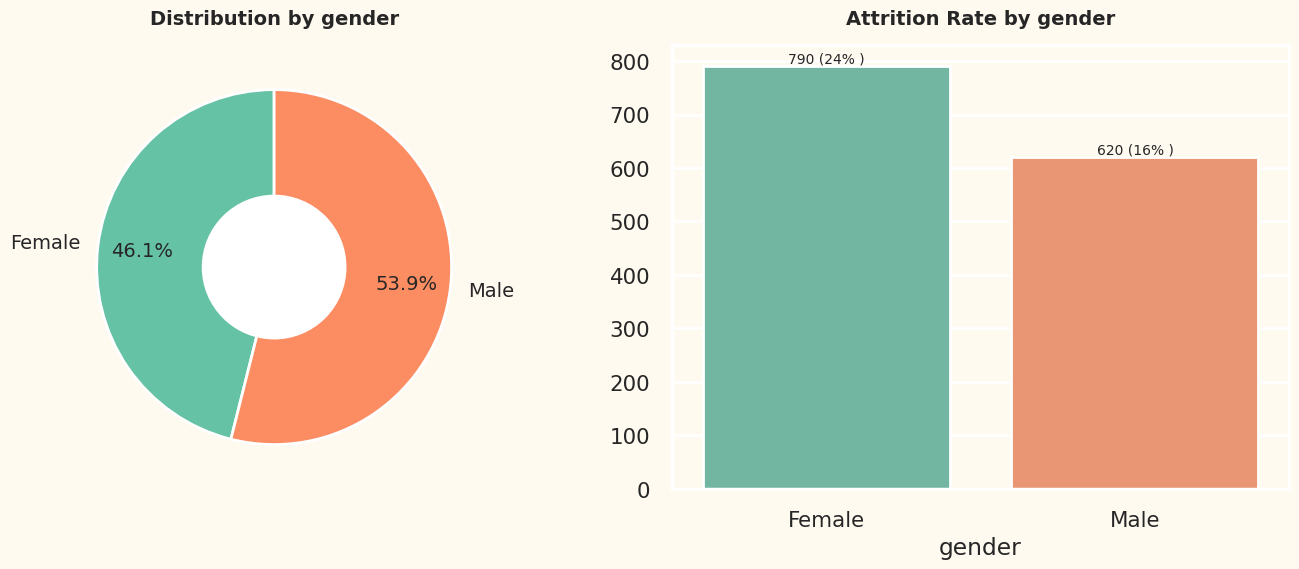

In [32]:
# data ori
pie_bar_plot(df_train, 'gender','churn')

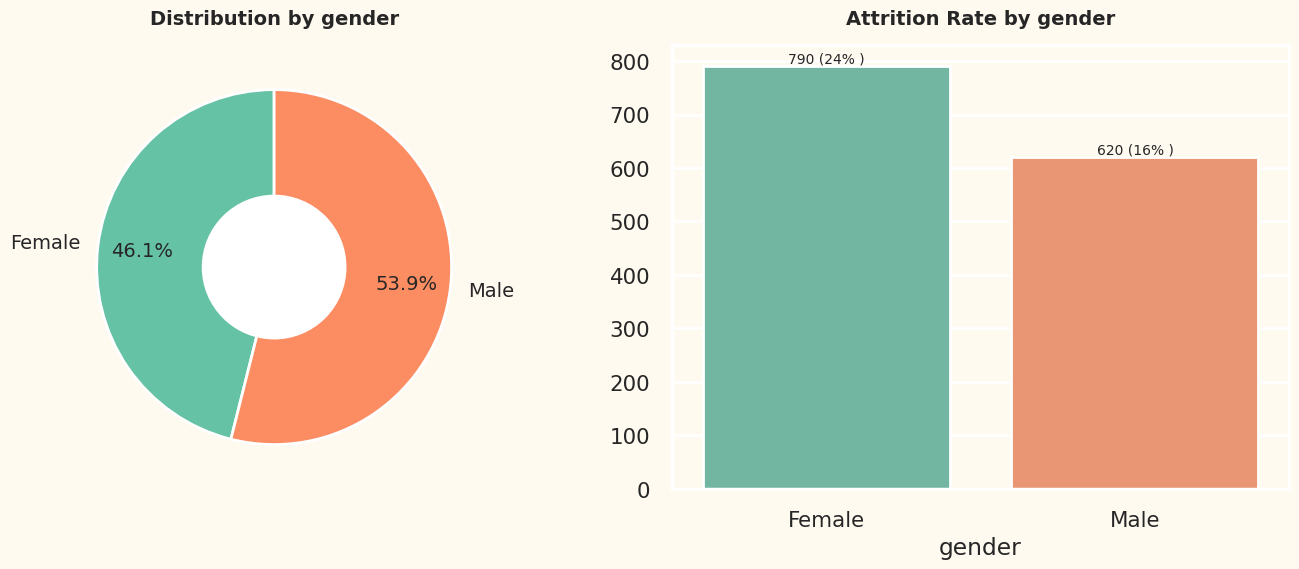

In [33]:
# data prep
pie_bar_plot(df_train_prep, 'gender','churn')

**What we found?**💡

* Nasabah terbanyak adalah Female/wanita
* Atrition lebih banyak pada Female/wanita



### country 🌎

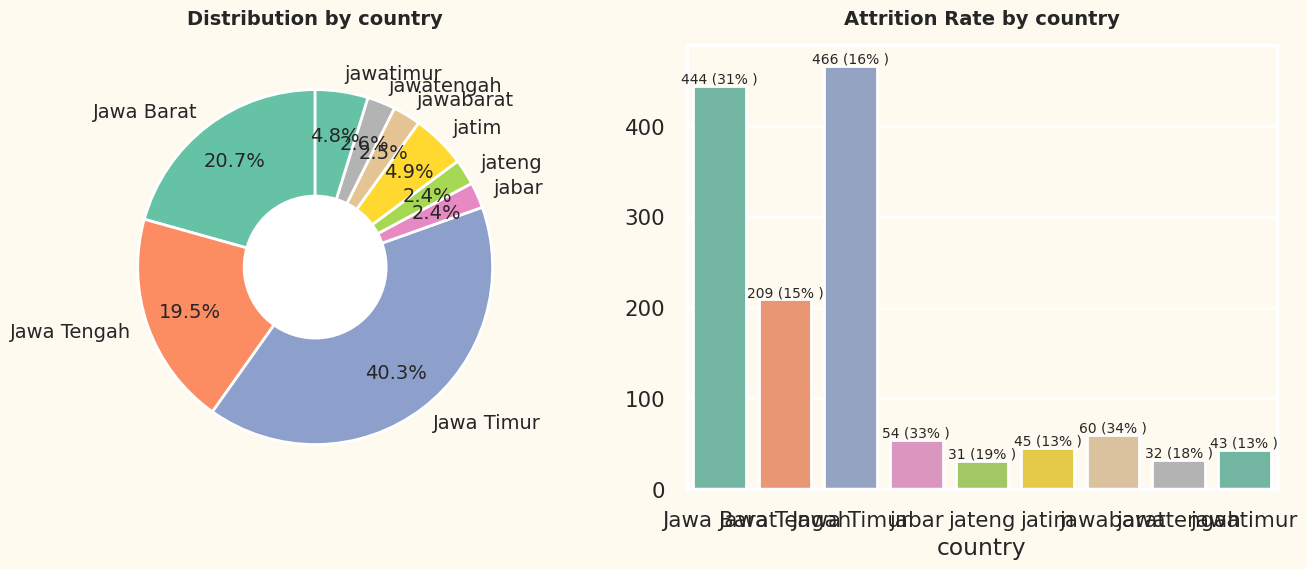

In [34]:
# data ori
pie_bar_plot(df_train, 'country','churn')

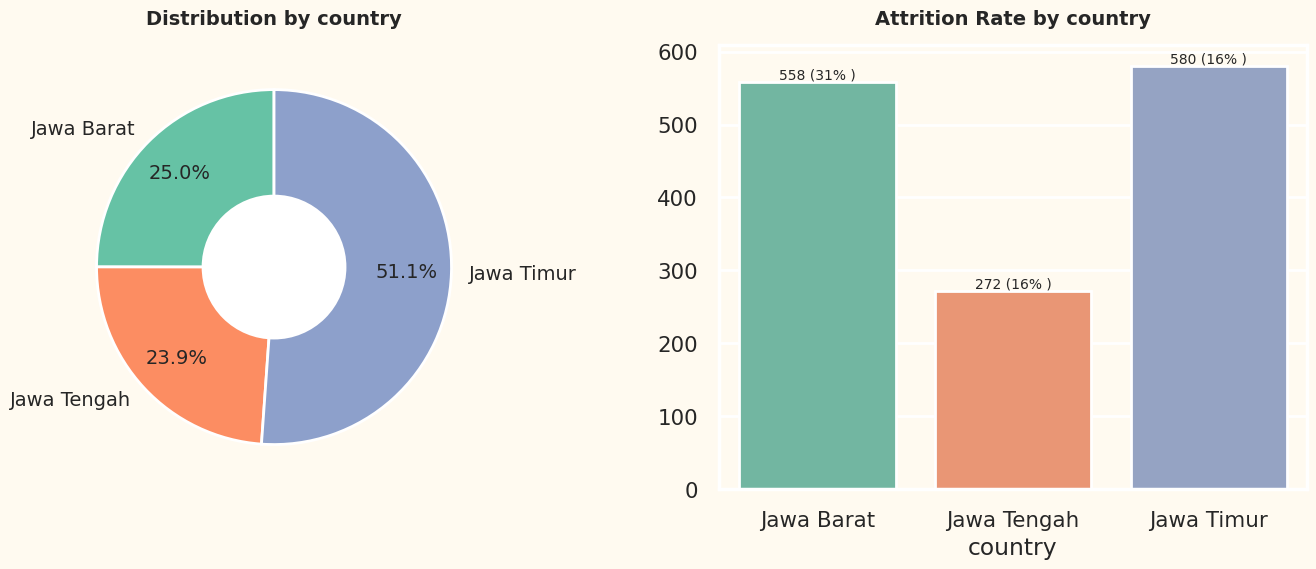

In [35]:
# data prep
pie_bar_plot(df_train_prep, 'country','churn')

**What we found?**💡

* Noise menyebabkan perbedaan informasi pada data ori dan data prep
* Mayoritas nasabah berada di Provinsi Jawa Timur
* Attrition terkecil yaitu pada Provinsi Jawa Tengah

### age 🔢

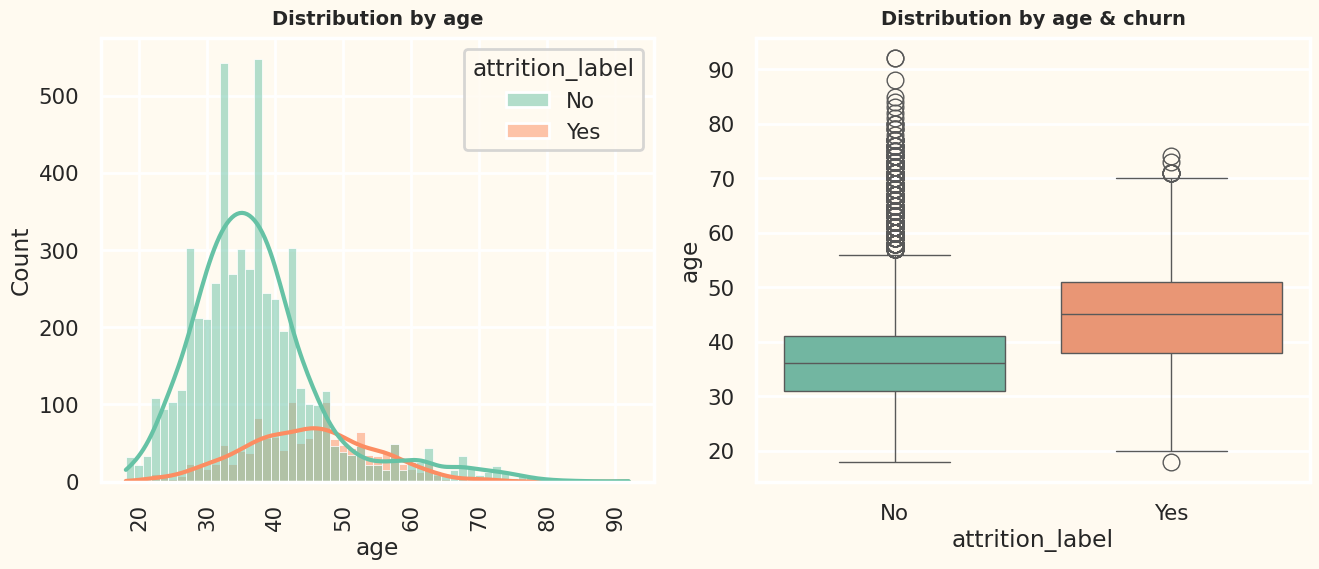

In [36]:
# data ori
hist_with_hue(df_train, 'age', 'churn')

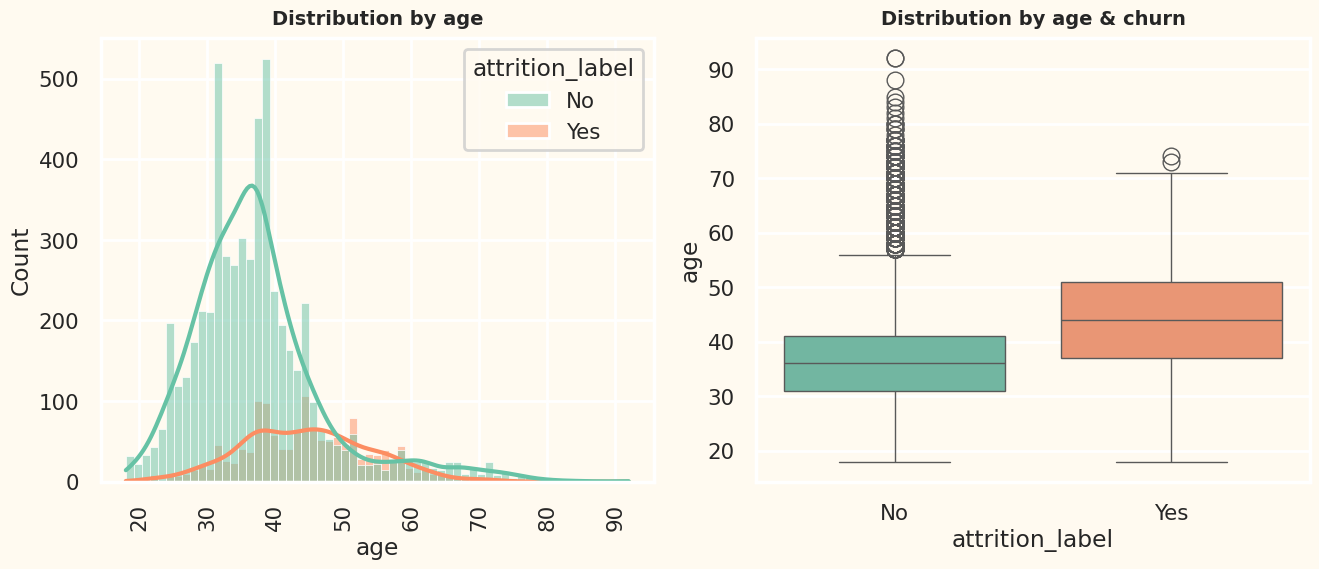

In [37]:
# data prep
hist_with_hue(df_train_prep, 'age', 'churn')

**What we found?**💡
* Mayoritas nasabah berusia 30-40 tahun
* Rata-rata usia berhenti menjadi nasabah lebih tinggi daripada yang tidak berhenti



### tenure ⌛️

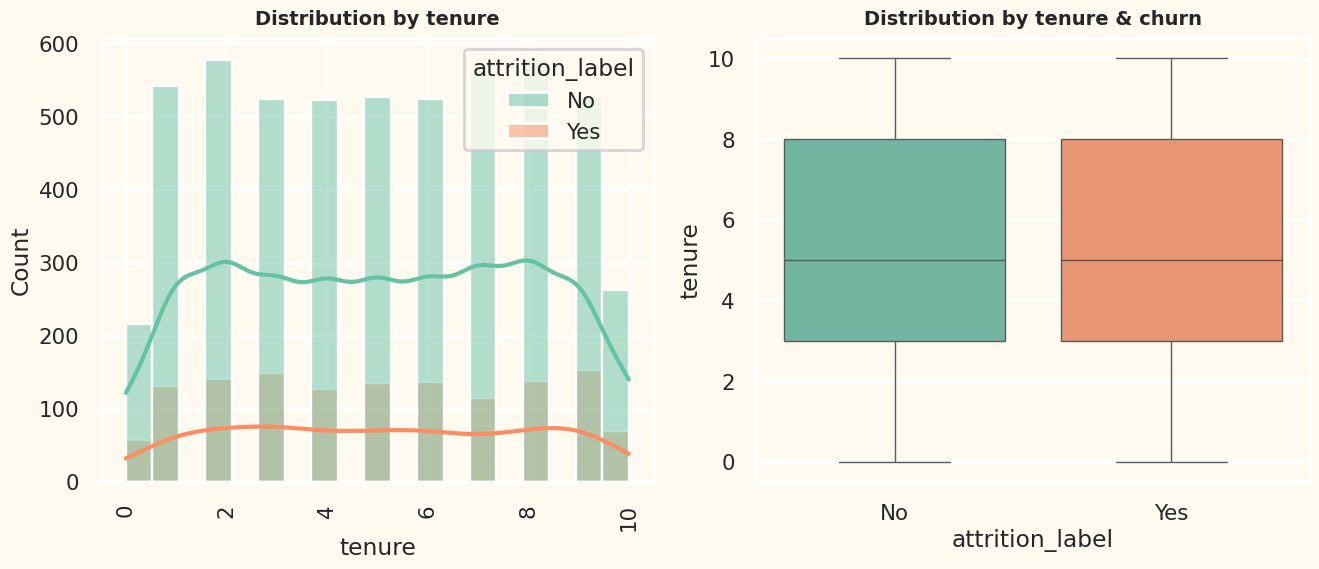

In [38]:
# data ori
hist_with_hue(df_train, 'tenure', 'churn')

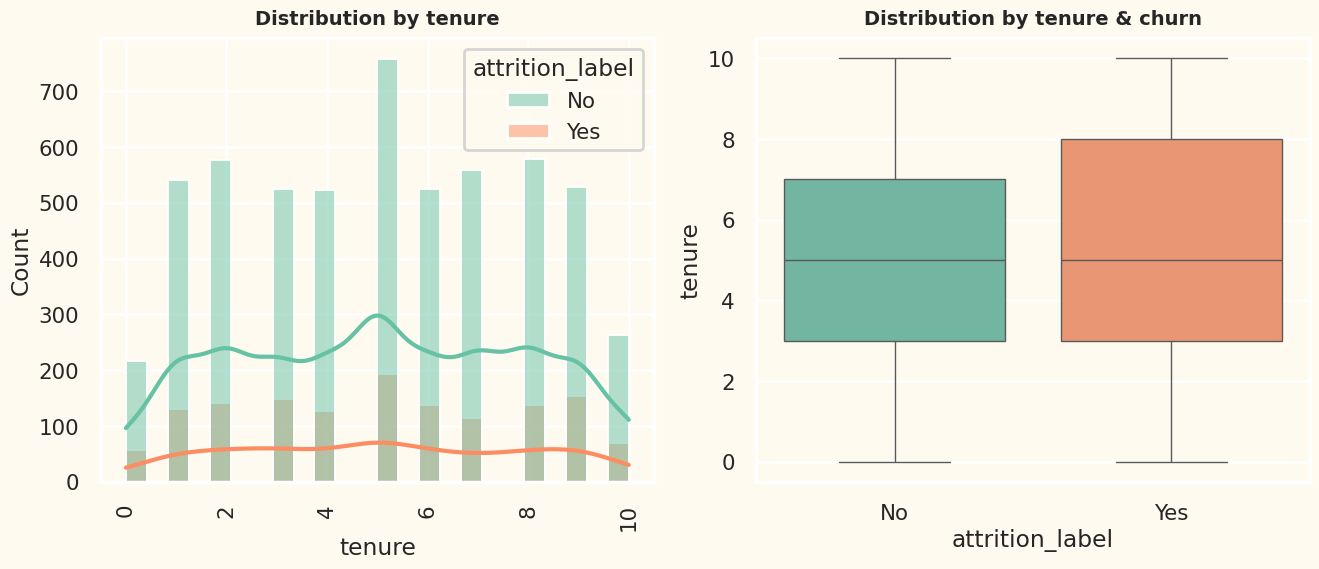

In [39]:
# data prep
hist_with_hue(df_train_prep, 'tenure', 'churn')

**What we found?**💡
* Rata-rata jangka waktu menjadi nasabah adalah sekitar 5 tahun

### balance 💸

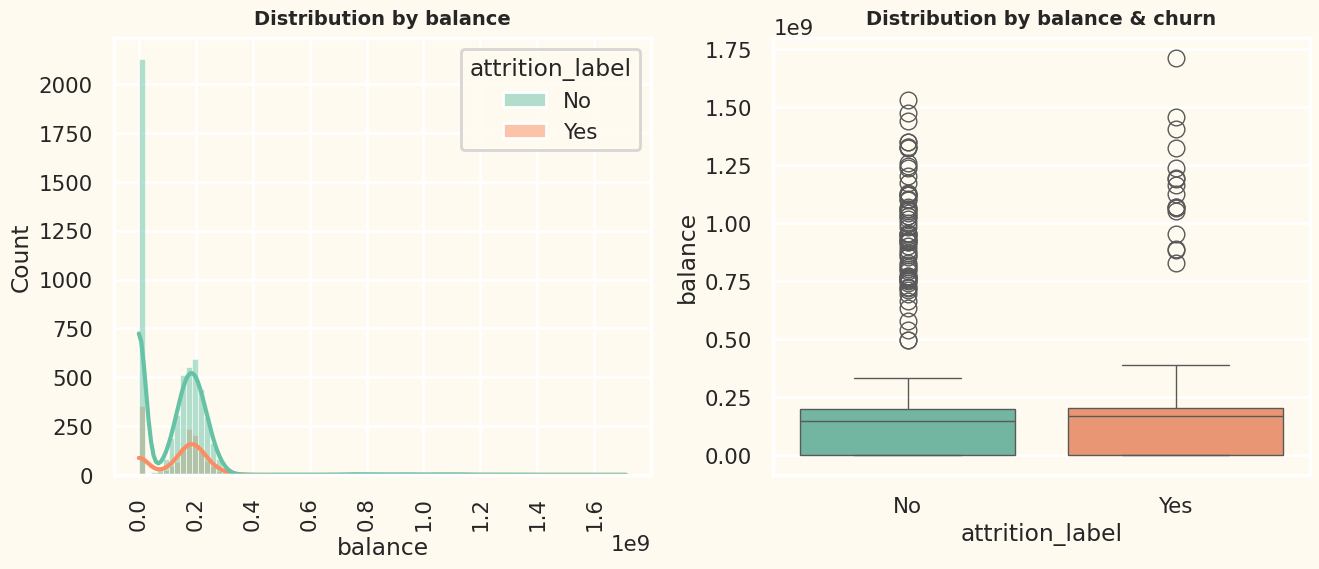

In [40]:
# data ori
hist_with_hue(df_train,'balance','churn')

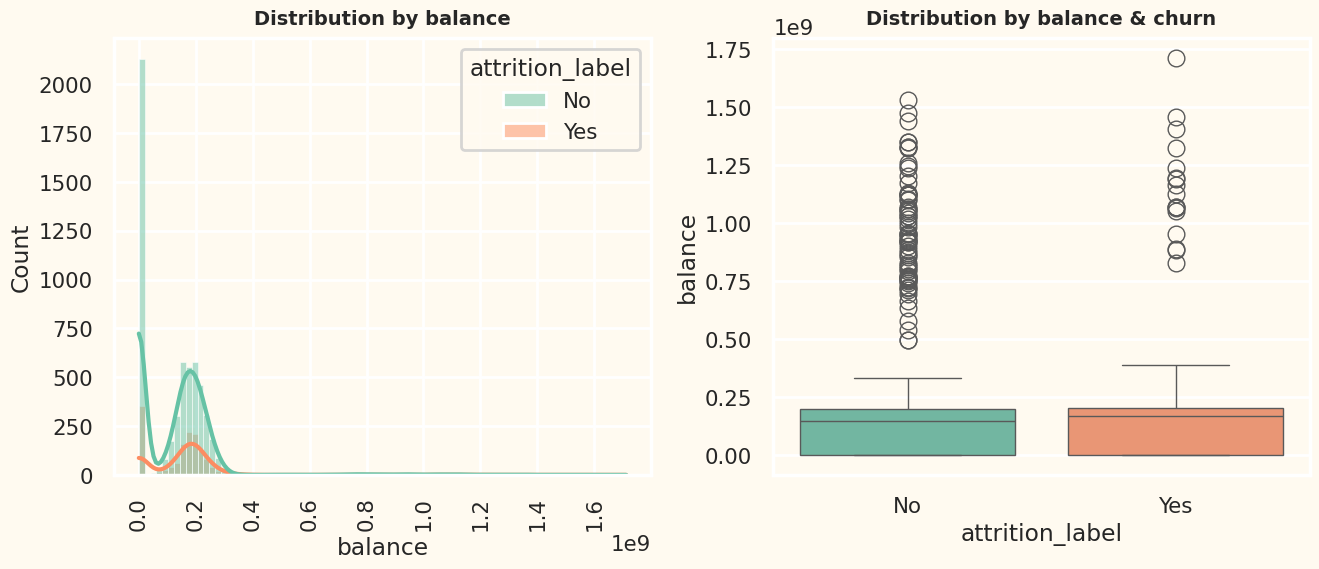

In [41]:
# data prep
hist_with_hue(df_train_prep,'balance','churn')

**What we found?**💡
* Banyak nasabah dengan saldo rekening 0
* Saldo nasabah sangat bervariasi

### products num 🪙

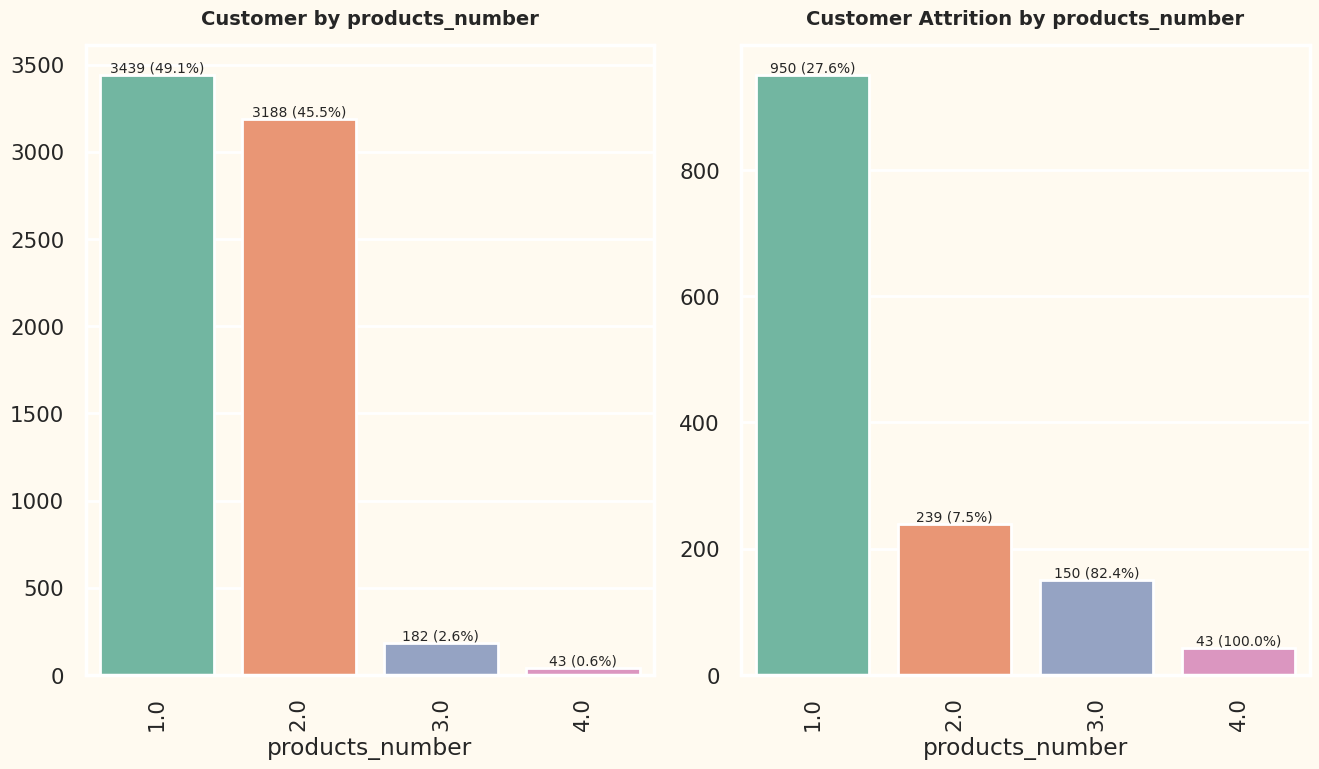

In [42]:
# data ori
count_percent_plot(df_train,'products_number','churn')

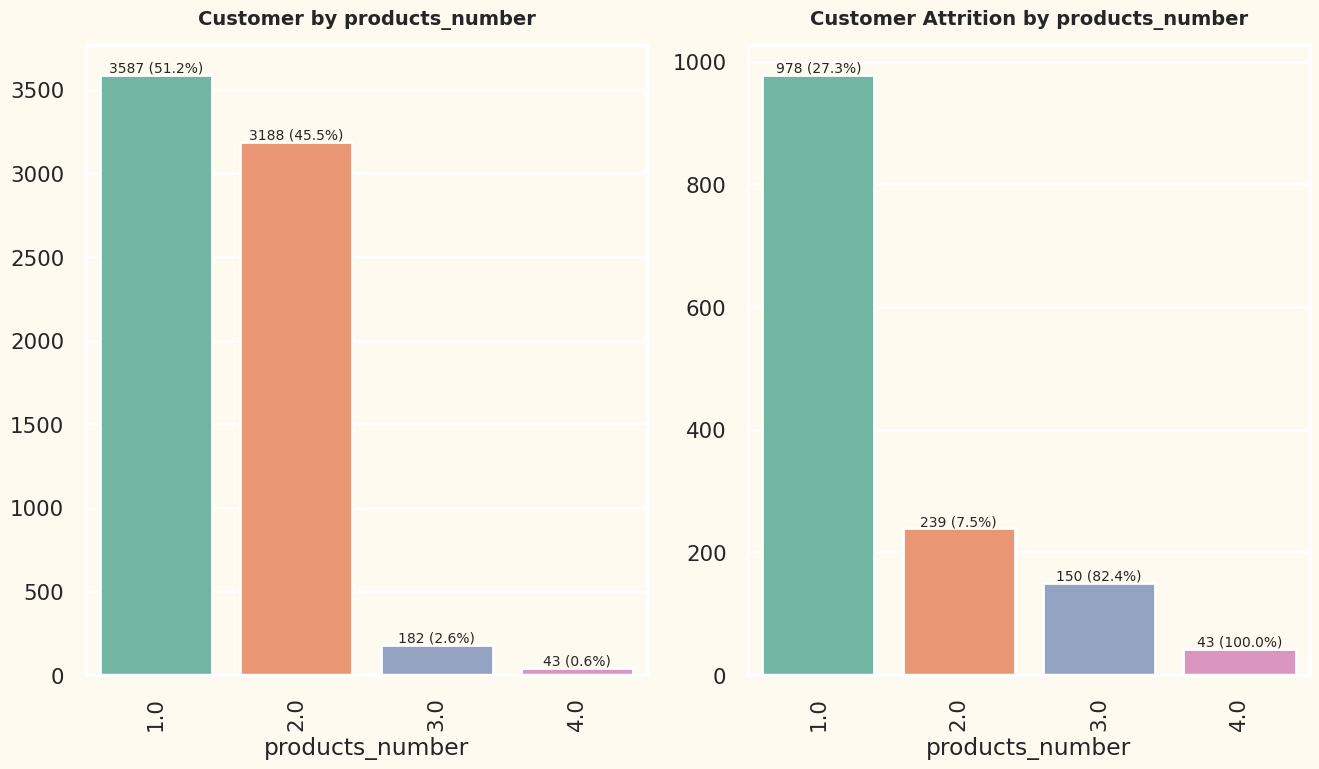

In [43]:
# data prep
count_percent_plot(df_train_prep,'products_number','churn')

**What we found?**💡
* Mayoritas nasabah memiliki 1 produk perbankan
* Semakin banyak produk perbankan yang dimiliki semakin kecil jumlah nasabah

### credit card 💳

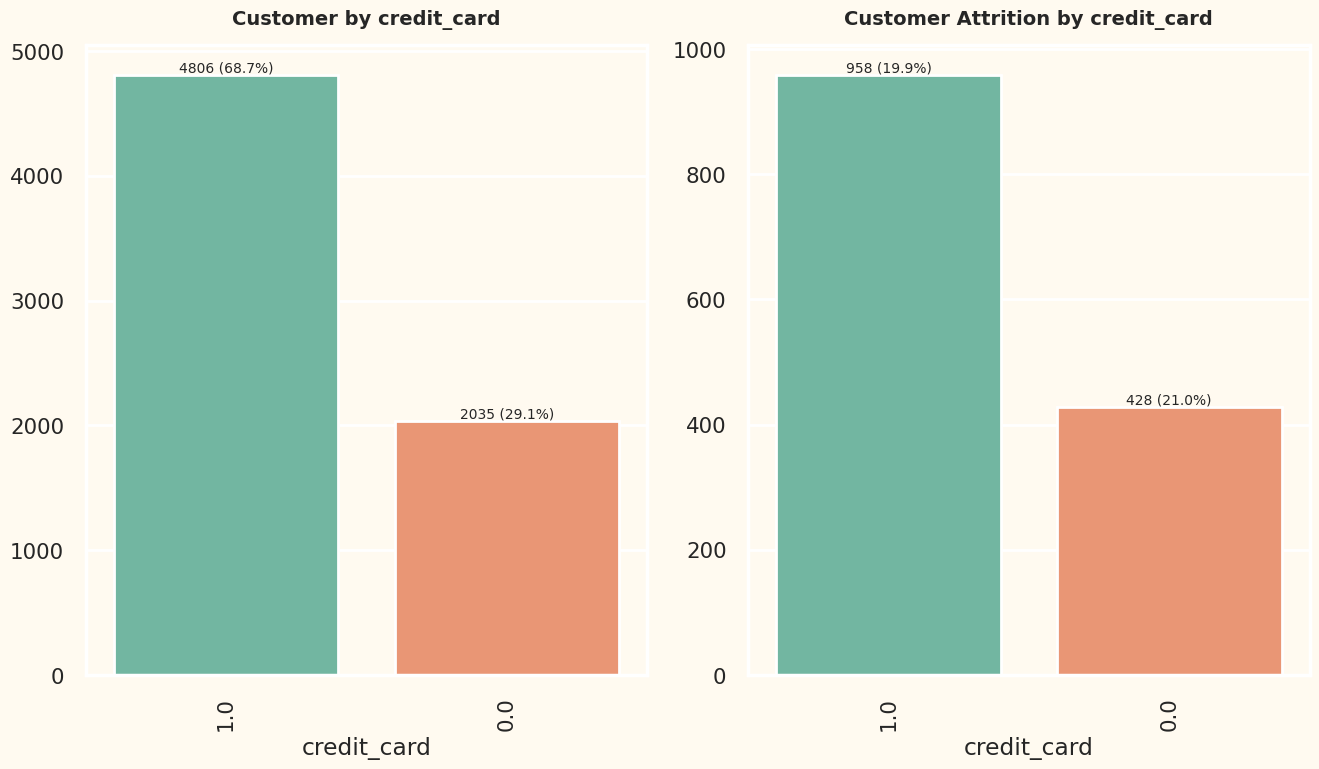

In [44]:
# data ori
count_percent_plot(df_train,'credit_card','churn')

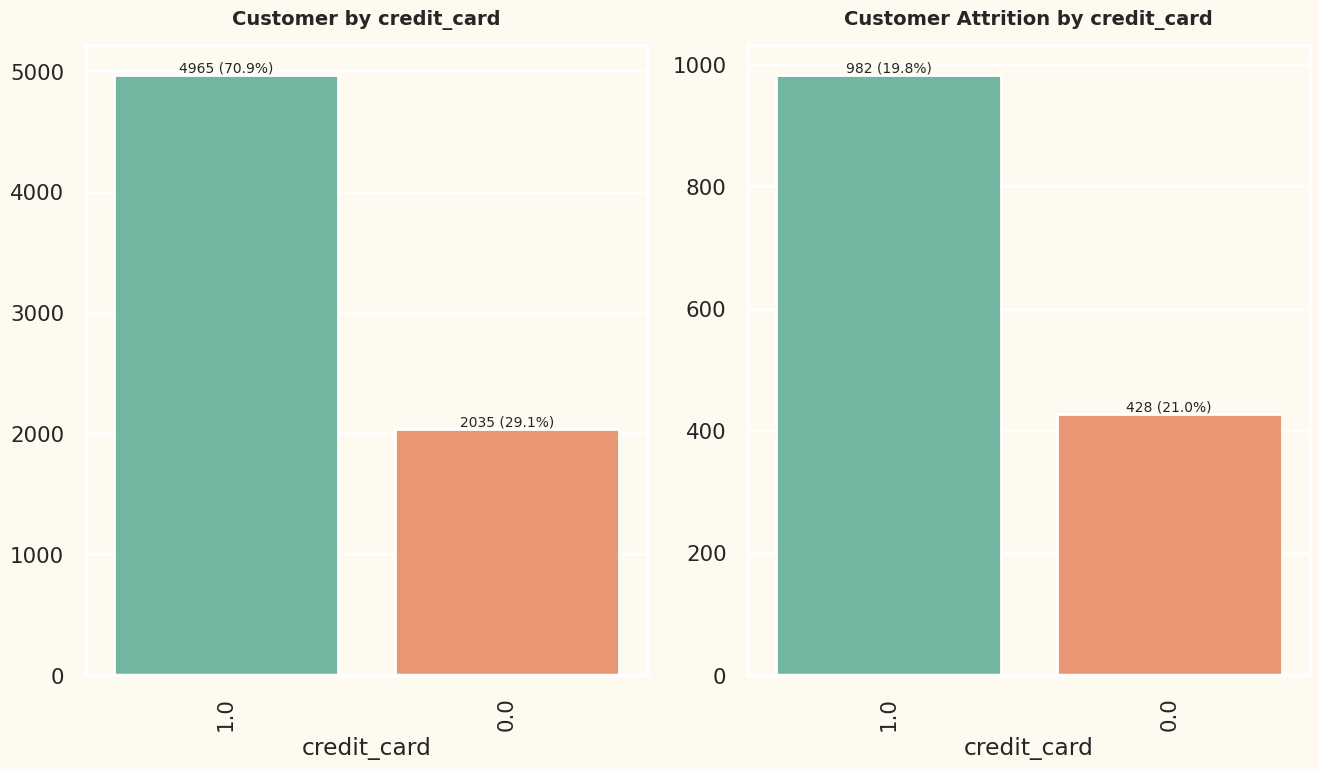

In [45]:
# data prep
count_percent_plot(df_train_prep,'credit_card','churn')

**What we found?**💡
* Mayoritas nasabah memiliki kartu kredit
* Jumlah nasabah yang memiliki kartu kredit dan tidak memiliki kartu kredit tidak seimbang

### active member ✅

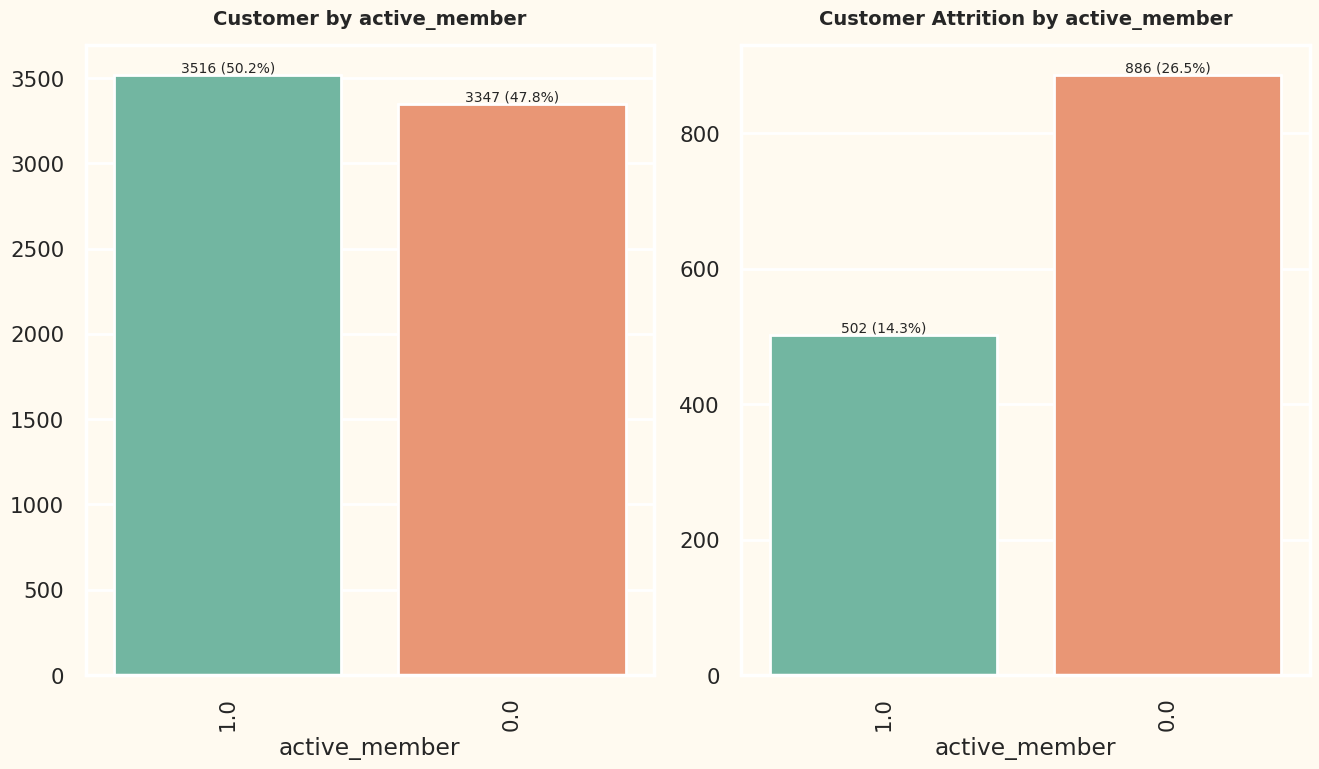

In [46]:
# data ori
count_percent_plot(df_train,'active_member','churn')

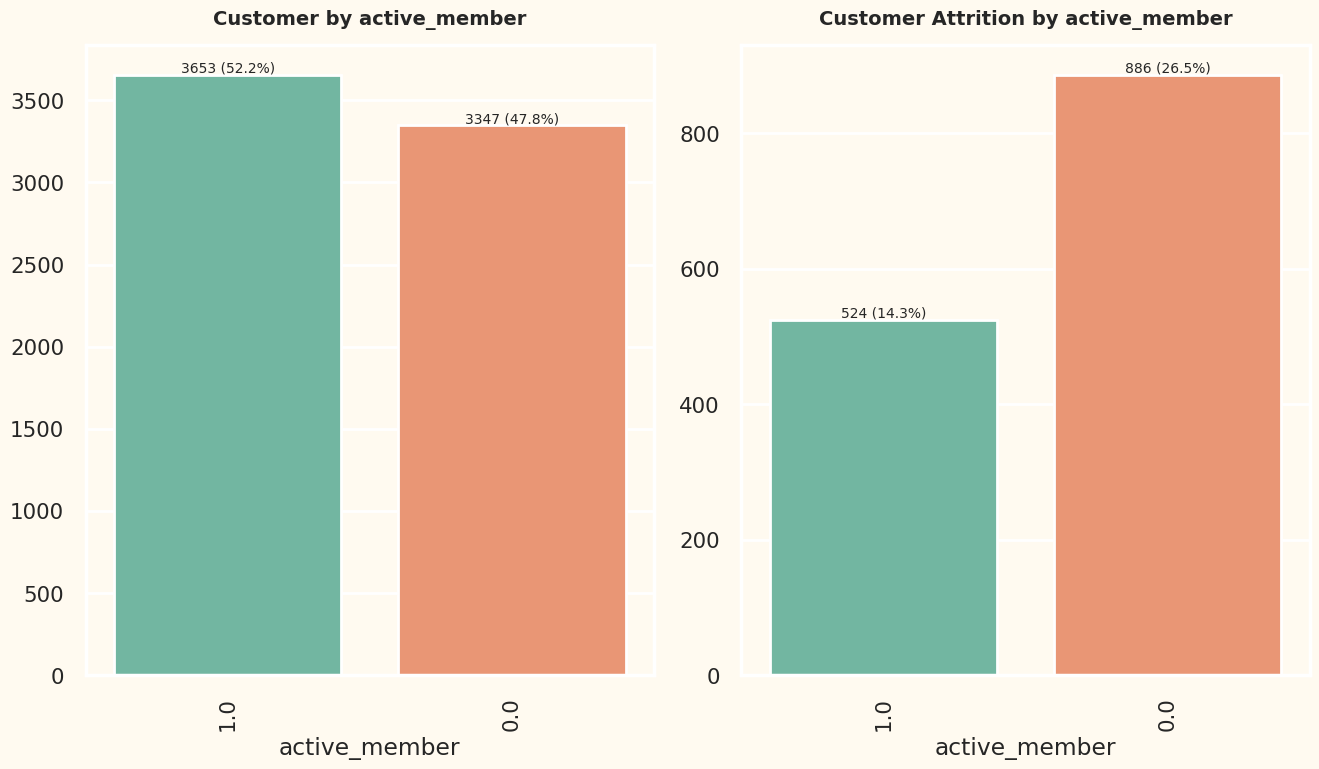

In [47]:
# data prep
count_percent_plot(df_train_prep,'active_member','churn')

**What we found?**💡

* Mayoritas nasabah adalah anggota aktif
* Attrition nasabah anggota tidak aktif lebih tinggi dibanding anggota aktif

### estimated salary 💰

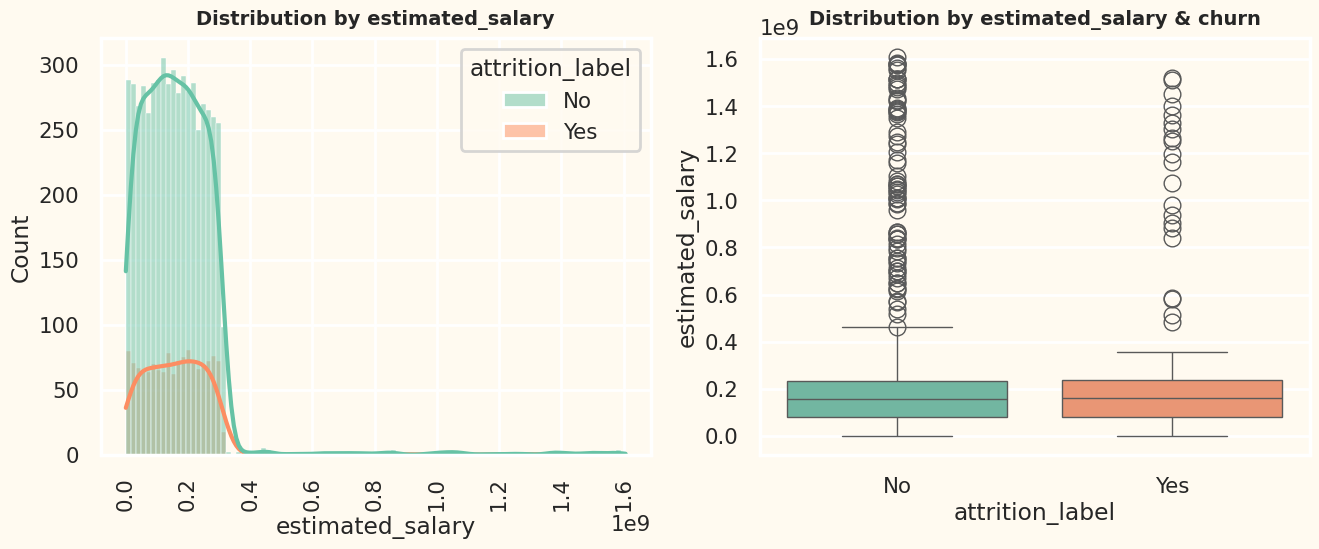

In [48]:
# data ori
hist_with_hue(df_train, 'estimated_salary', 'churn')

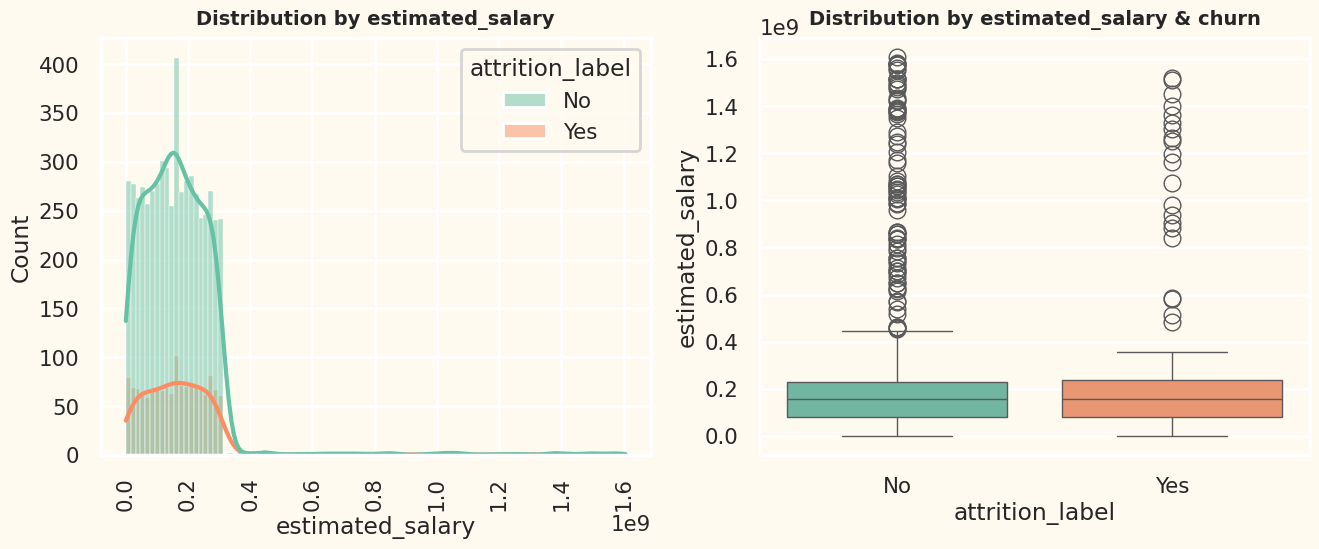

In [49]:
# data prep
hist_with_hue(df_train_prep, 'estimated_salary', 'churn')

**What we found?**💡
* Mayoritas estimated salary nasabah berada di angka 0-30 juta rupiah
* Nasabah estimated salary di atas 30 juta rupiah sangat kecil dibanding dibawah 30 juta

In [50]:
# droping the columns which we have created for analysis purpose
df_train_prep.drop(['attrition_label'],axis = 1, inplace=True)

**Why we do this**❓

Attrition label hanya kami gunakan untuk EDA, sehingga lebih baik didrop untuk analisis selanjutnya

# Feature Importance 📌

Kami melakukan uji ANOVA untuk menganalisis apakah kolom/fitur/variabel penting untuk churn

## num cols

In [51]:
num_cols = df_train_prep.select_dtypes(np.number).columns

In [52]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(df_train_prep[column],df_train_prep['churn'])

    f_scores[column] = f_score
    p_values[column] = p_value

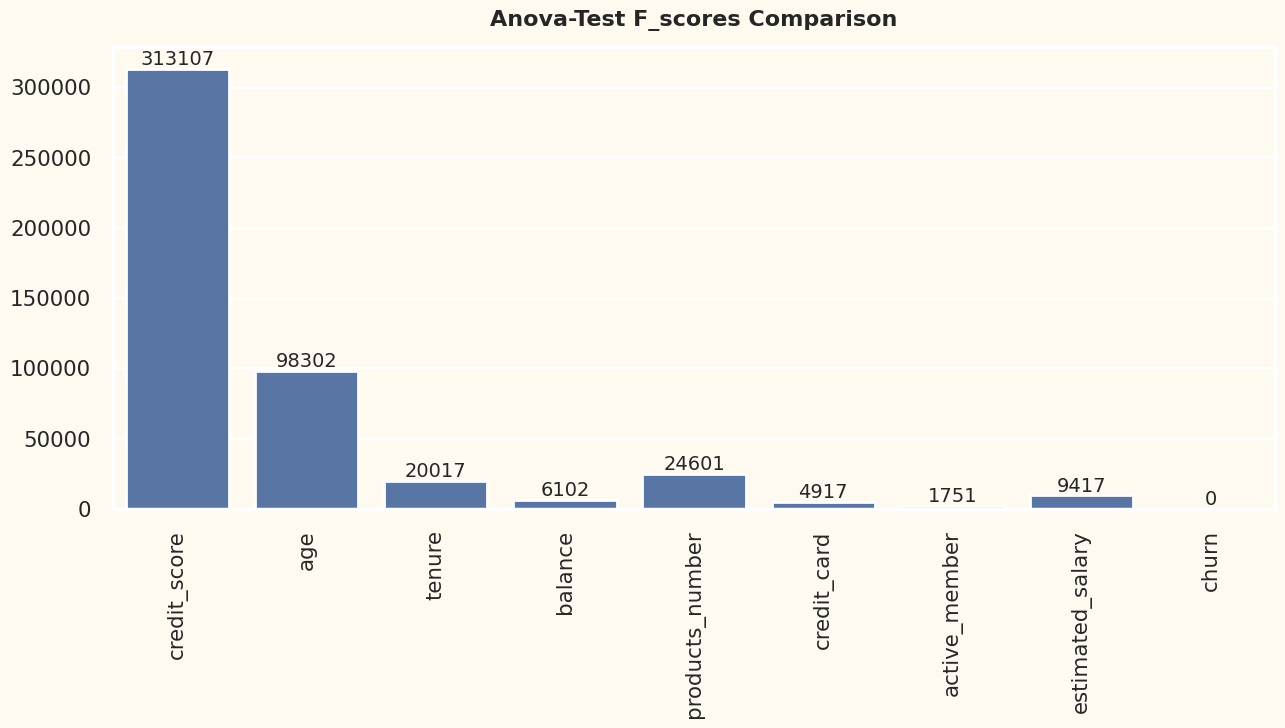

In [53]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

In [54]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

,Features,F_Score,P_value
0,credit_score,3.131080e+05,0.00000000000000000000
1,age,9.830246e+04,0.00000000000000000000
2,tenure,2.001705e+04,0.00000000000000000000
3,balance,6.102479e+03,0.00000000000000000000
4,products_number,2.460110e+04,0.00000000000000000000
5,credit_card,4.917999e+03,0.00000000000000000000
6,active_member,1.751117e+03,0.00000000000000000000
7,estimated_salary,9.417842e+03,0.00000000000000000000
8,churn,3.299335e-30,1.00000000000000000000


**What we found?**💡

p-value semua variabel numerik < 0.05 sehingga semua variabel numerik penting atau berpengaruh pada churn

## cat cols

In [55]:
cat_cols = df_train_prep.select_dtypes(include="object").columns.tolist()

In [56]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df_train_prep[col], df_train_prep['churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

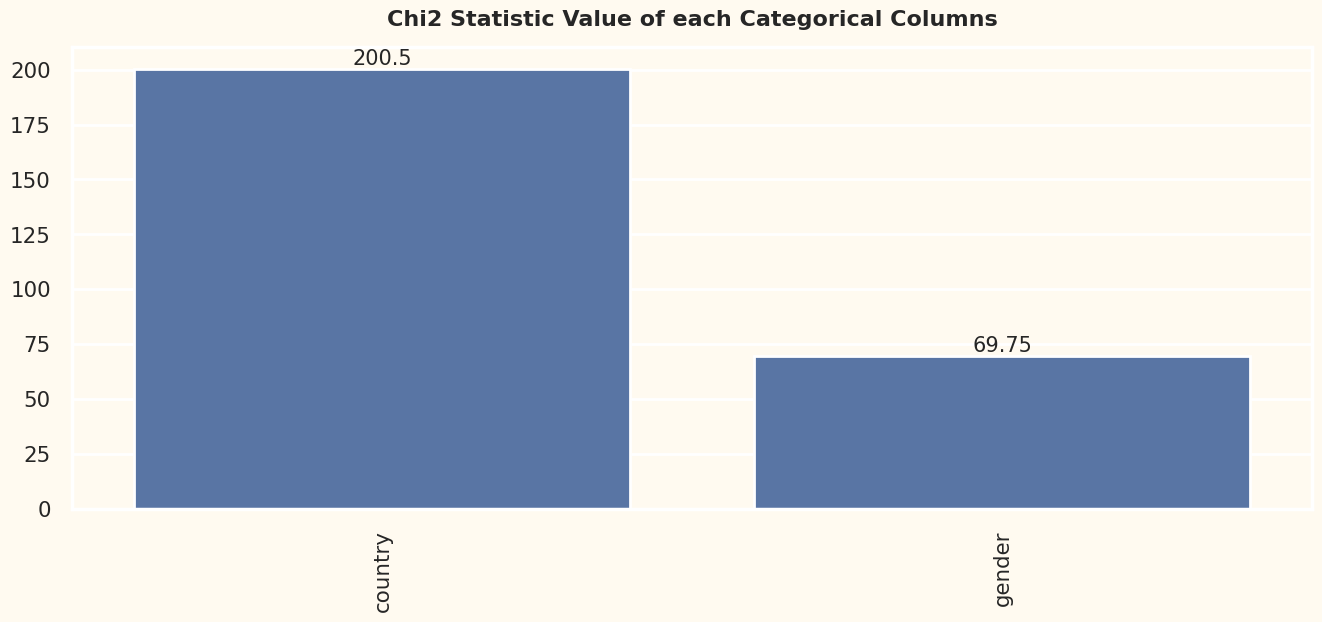

In [57]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [58]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

,Features,Chi_2 Statistic,P_value
0,country,200.498876,0.00000000000000000000
1,gender,69.748755,0.00000000000000006736


**What we found?**💡

pvalue variabel country dan gender < 0.05 sehingga kedua variabel penting untung churn

# Encoding 0️⃣1️⃣

## Gender

In [59]:
df_train_prep["gender"] = df_train_prep["gender"].replace({"Female":0 ,"Male":1})
df_test["gender"] = df_test["gender"].replace({"Female":0 ,"Male":1})

## Country

In [60]:
# Using pandas get_dummies for one-hot encoding
df_train_prep_encoded = pd.get_dummies(df_train_prep, columns=['country'], prefix='c')
df_test_encoded = pd.get_dummies(df_test, columns=['country'], prefix='c')

In [61]:
# Convert specific boolean columns to integer (1 and 0)
columns_to_convert = ['c_Jawa Timur', 'c_Jawa Barat', 'c_Jawa Tengah']
df_train_prep_encoded[columns_to_convert] = df_train_prep_encoded[columns_to_convert].astype(int)
df_test_encoded[columns_to_convert] = df_test_encoded[columns_to_convert].astype(int)


# Correlation Matrix ⛓

<Axes: title={'center': 'Correlation Plot'}>

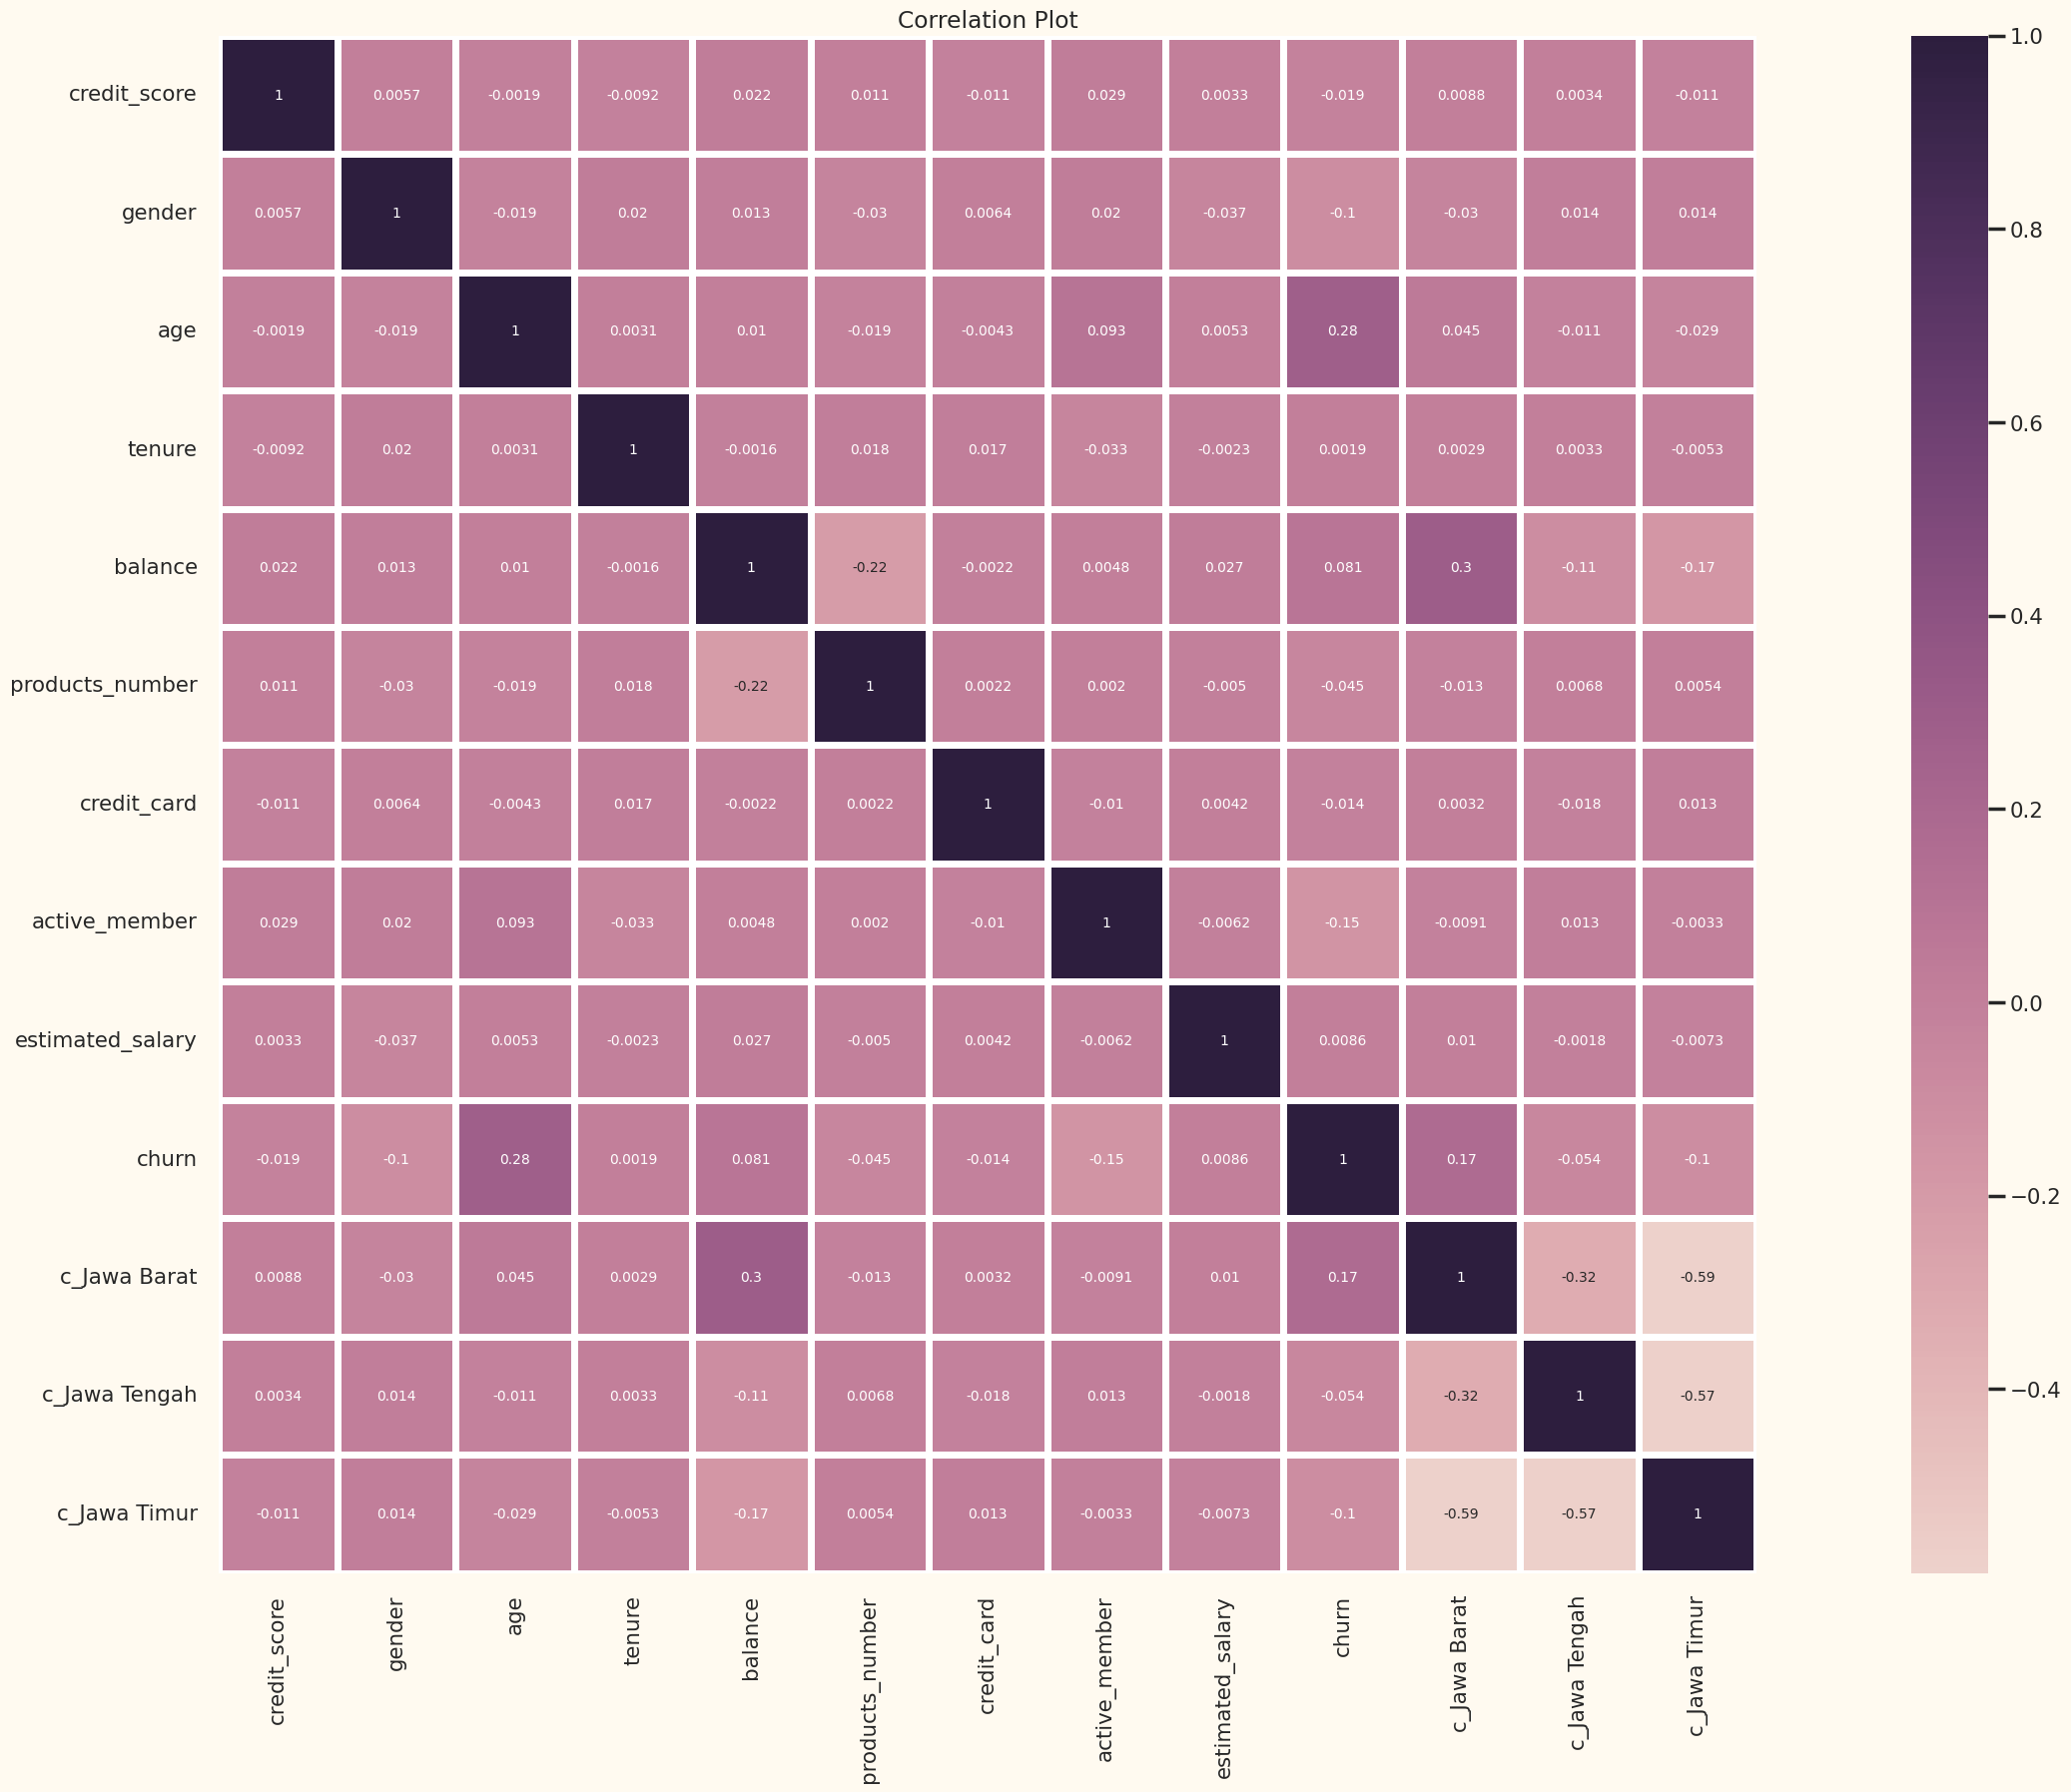

In [64]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df_train_prep_encoded.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10}, cmap=sns.cubehelix_palette(as_cmap=True))

In [65]:
# Calculate the correlation matrix
correlation_matrix = df_train_prep_encoded.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:


**What we found?**💡
tidak ada variabel/fitur dengan korelasi tinggi

# Imbalance ⚖️

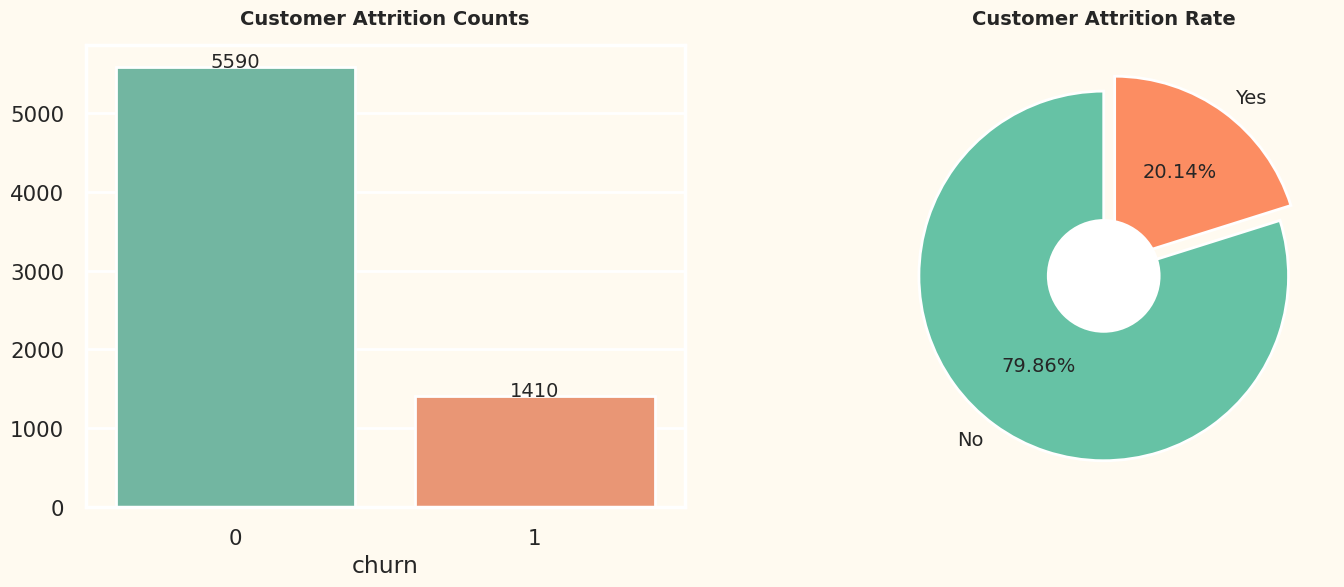

In [66]:
#Visualization to show Customer Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df_train_prep["churn"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Customer Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Customer Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Customer Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

**What we found?**💡

Data tidak balance sehingga harus dilakukan balancing

# Independent vs Dependent

In [67]:
x = df_train_prep_encoded.drop(['churn'], axis=1) # Independent variabel
y = df_train_prep_encoded[['churn']] # Dependen variabel

In [68]:
# Balancing Imbalanced Data
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote churn
0        5590
1        1410
Name: count, dtype: int64

After Smoote churn
0        5590
1        5590
Name: count, dtype: int64


# Feature Engineering ⚙️

In [69]:
def newfeatures(df):
    df['IsSenior'] = df['age'].apply(lambda x: 1 if x >= 60 else 0)
    df['IsActive_by_CreditCard'] = df['credit_card'] * df['active_member']
    df['Products_Per_Tenure'] =  df['tenure'] / df['products_number']
    df['AgeCat'] = np.round(df.age/20).astype('int').astype('category')
    return df

**Why we do this**❓

kami menambah beberapa variabel untuk memperluas informasi yang didapat

In [70]:
newfeatures(x_smote)
newfeatures(df_test_encoded)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,c_Jawa Barat,c_Jawa Tengah,c_Jawa Timur,IsSenior,IsActive_by_CreditCard,Products_Per_Tenure,AgeCat
0,624,1,51,10,191743610.0,2,1,1,1.986174e+08,0,0,1,0,1,5.000000,3
1,717,1,31,4,201565523.7,1,0,0,6.398102e+07,0,0,1,0,0,4.000000,2
2,566,0,21,3,0.0,2,1,1,5.634882e+06,0,0,1,0,1,1.500000,1
3,672,1,52,8,264163135.8,1,0,0,8.764698e+07,0,0,1,0,0,8.000000,3
4,649,0,45,5,144173768.0,1,1,0,2.693794e+08,0,0,1,0,0,5.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,768,1,54,8,108321049.7,1,1,1,1.078057e+08,0,0,1,0,1,8.000000,3
2996,682,0,58,1,0.0,1,1,1,1.097774e+06,0,0,1,0,1,1.000000,3
2997,735,0,38,1,0.0,3,0,0,1.432935e+08,0,0,1,0,0,0.333333,2
2998,667,1,43,8,295579231.9,1,1,0,1.515099e+08,0,0,1,0,0,8.000000,2


# Feature Scaling

In [71]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler()
minmax = MinMaxScaler()

In [72]:
x_smote_scaled = x_smote
df_test_scaled = df_test_encoded

In [73]:
x_smote.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,c_Jawa Barat,c_Jawa Tengah,c_Jawa Timur,IsSenior,IsActive_by_CreditCard,Products_Per_Tenure,AgeCat
0,596,1,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,1,0,0,0,0.0,1.5,2
1,623,1,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0,0,1,0,1.0,0.5,2
2,601,0,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0,1,0,0,0.0,2.0,2
3,506,1,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,1,0,0,0,1.0,4.0,3
4,560,0,27.0,5.0,194221253.6,1.0,1.0,1.0,1.781762e+08,0,1,0,0,1.0,5.0,1


In [74]:
# Scaled with minmax
columns_to_minmax_scale = ['credit_score', 'age', 'tenure', 'products_number','Products_Per_Tenure','AgeCat']
x_smote_scaled[columns_to_minmax_scale] = minmax.fit_transform(x_smote_scaled[columns_to_minmax_scale])

In [75]:
# Scaled with Robust
columns_to_RobustScaler = ['balance','estimated_salary']
x_smote_scaled[columns_to_RobustScaler] = scaler.fit_transform(x_smote_scaled[columns_to_RobustScaler])

**Why we do this**❓

Kami melakukan:
* minmax scale pada` ['credit_score', 'age', 'tenure', 'products_number','Products_Per_Tenure','AgeCat']` karena tidak terdapat outlier dan untuk memudahkan analisis
* robust scale pada` ['balance','estimated_salary']` karena variabel ini terdapat banyak outlier, sehingga tidak dapat digunakan minmax scale yang rentan terhadap outlier

In [76]:
df_test_scaled[columns_to_minmax_scale] = minmax.transform(df_test_scaled[columns_to_minmax_scale])
df_test_scaled[columns_to_RobustScaler] = scaler.transform(df_test_scaled[columns_to_RobustScaler])

# PCA

In [77]:
from sklearn.decomposition import PCA


In [78]:
x_smote_scaled.shape

(11180, 16)

In [79]:
df_test_scaled.shape

(3000, 16)

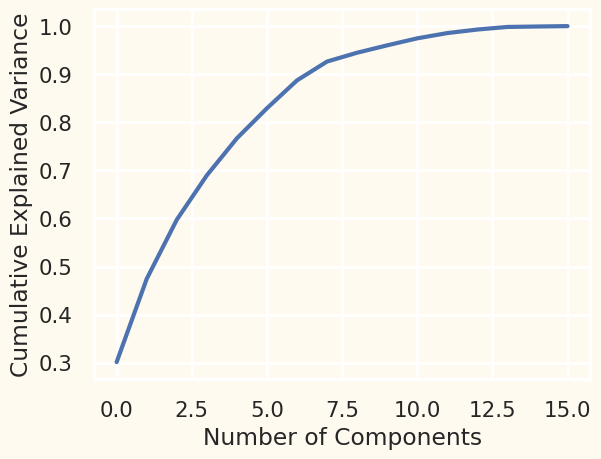

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_smote_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [81]:
## PCA- Transformation
pca=PCA(n_components=14)
pca

PCA(n_components=14)

In [82]:
#Scaled Data
x_smote_scaled=pca.fit_transform(x_smote_scaled)
df_test_scaled = pca.transform(df_test_scaled)

# Baseline Model Build

In [83]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []

# Model Building - Scaled Data

In [84]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

def model_prediction(model, x, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred)
        d = recall_score(y_test, x_test_pred)
        e = roc_auc_score(y_test, y_test_prob)
        f = f1_score(y_test, x_test_pred)

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        Roc_Auc_score.append(e)
        f1_score_.append(f)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean ROC_AUC Score of {model} model is:", np.mean(Roc_Auc_score))
    print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    y_pred_all = cross_val_predict(model, x, y, cv=skf)
    print(classification_report(y, y_pred_all))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y, y_pred_all)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

In [85]:
y_smote_array = np.array(y_smote)

## Logistic Regression


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 79.5438282647585
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 79.18604651162791
Mean Precision Score of LogisticRegression() model is: 0.8249233685330013
Mean Recall Score of LogisticRegression() model is: 0.7413237924865832
Mean ROC_AUC Score of LogisticRegression() model is: 0.8803962480918839
Mean f1 Score of LogisticRegression() model is: 0.7806962613262277

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      5590
           1       0.82      0.74      0.78      5590

    accuracy                           0.79     11180
   macro avg       0.79      0.79      0.79     11180
weighted avg       0.79      0.79      0.79     11180


--------

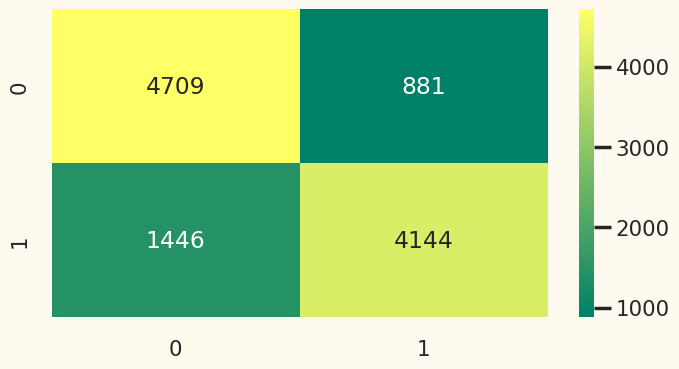

In [86]:
model_prediction(LogisticRegression(), x_smote_scaled, y_smote_array, n_splits=5, random_state=42)

## KNN


------------------------------------------------------------------------
Mean Accuracy_Score of KNeighborsClassifier() model on Training Data is: 84.2095259391771
Mean Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 81.23881932021466
Mean Precision Score of KNeighborsClassifier() model is: 0.8395568466741485
Mean Recall Score of KNeighborsClassifier() model is: 0.7720930232558139
Mean ROC_AUC Score of KNeighborsClassifier() model is: 0.8929622921073601
Mean f1 Score of KNeighborsClassifier() model is: 0.8042091511616812

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      5590
           1       0.85      0.80      0.83      5590

    accuracy                           0.83     11180
   macro avg       0.83      0.83      0.83     11180
weighted avg       0.83      0.83      0.83     11

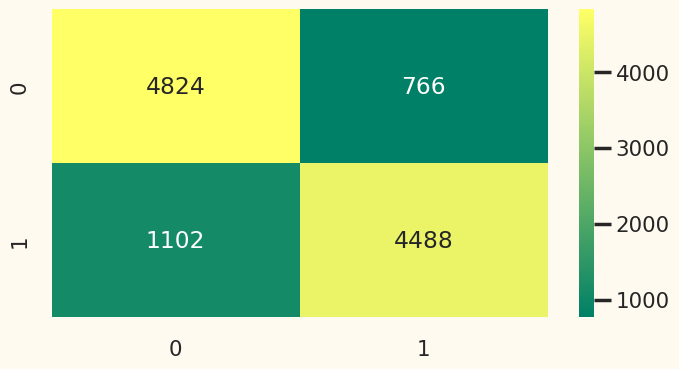

In [87]:
model_prediction(KNeighborsClassifier(), x_smote_scaled, y_smote_array, n_splits=5, random_state=42)

## Naive Bayes


------------------------------------------------------------------------
Mean Accuracy_Score of GaussianNB() model on Training Data is: 82.01774001192605
Mean Accuracy_Score of GaussianNB() model on Testing Data is: 79.9731663685152
Mean Precision Score of GaussianNB() model is: 0.8528257614462308
Mean Recall Score of GaussianNB() model is: 0.7268336314847943
Mean ROC_AUC Score of GaussianNB() model is: 0.8883316105619222
Mean f1 Score of GaussianNB() model is: 0.7821636665031716

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      5590
           1       0.88      0.64      0.74      5590

    accuracy                           0.77     11180
   macro avg       0.80      0.77      0.77     11180
weighted avg       0.80      0.77      0.77     11180


----------------------------------------------------------------

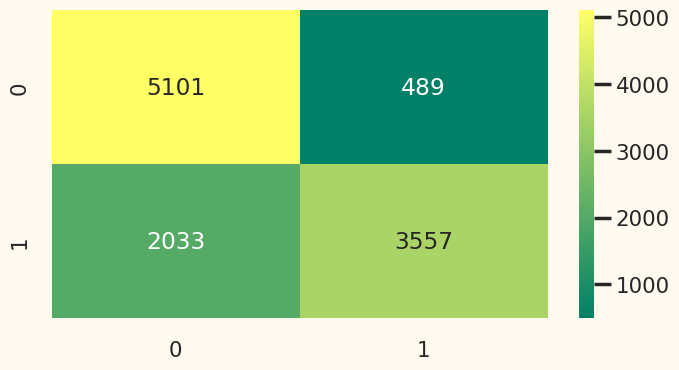

In [88]:
model_prediction(GaussianNB(), x_smote_scaled, y_smote_array, n_splits=5, random_state=42)

# Model Building - Unscaled Data

In [89]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def model_prediction(model, x, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred)
        d = recall_score(y_test, x_test_pred)
        e = roc_auc_score(y_test, y_test_prob)
        f = f1_score(y_test, x_test_pred)

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        Roc_Auc_score.append(e)
        f1_score_.append(f)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean ROC_AUC Score of {model} model is:", np.mean(Roc_Auc_score))
    print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    y_pred_all = cross_val_predict(model, x, y, cv=skf)
    print(classification_report(y, y_pred_all))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y, y_pred_all)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

## Decision Tree


------------------------------------------------------------------------
Mean Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 86.51330500894456
Mean Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 81.37075134168158
Mean Precision Score of DecisionTreeClassifier() model is: 0.8521099536341712
Mean Recall Score of DecisionTreeClassifier() model is: 0.7611359570661896
Mean ROC_AUC Score of DecisionTreeClassifier() model is: 0.8801574735743933
Mean f1 Score of DecisionTreeClassifier() model is: 0.800840615081615

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5590
           1       0.85      0.86      0.85      5590

    accuracy                           0.85     11180
   macro avg       0.85      0.85      0.85     11180
weighted avg       0.85      0.85   

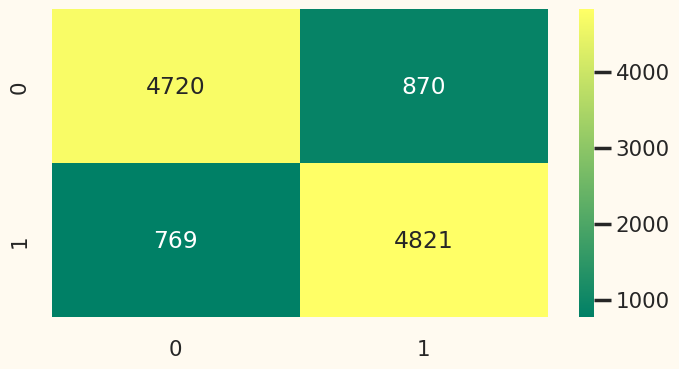

In [90]:
model_prediction(DecisionTreeClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## Random Forest


------------------------------------------------------------------------
Mean Accuracy_Score of RandomForestClassifier() model on Training Data is: 89.2093023255814
Mean Accuracy_Score of RandomForestClassifier() model on Testing Data is: 83.25581395348837
Mean Precision Score of RandomForestClassifier() model is: 0.870027917442294
Mean Recall Score of RandomForestClassifier() model is: 0.7828622540250447
Mean ROC_AUC Score of RandomForestClassifier() model is: 0.8963641309391612
Mean f1 Score of RandomForestClassifier() model is: 0.8215297437468047

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5590
           1       0.94      0.87      0.90      5590

    accuracy                           0.91     11180
   macro avg       0.91      0.91      0.91     11180
weighted avg       0.91      0.91    

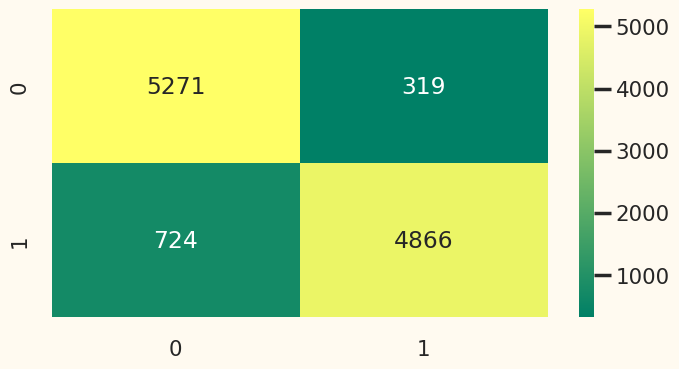

In [91]:
model_prediction(RandomForestClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## Ada Boost


------------------------------------------------------------------------
Mean Accuracy_Score of AdaBoostClassifier() model on Training Data is: 89.18679189028029
Mean Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 84.19499105545619
Mean Precision Score of AdaBoostClassifier() model is: 0.8772574760271618
Mean Recall Score of AdaBoostClassifier() model is: 0.7956171735241502
Mean ROC_AUC Score of AdaBoostClassifier() model is: 0.9058273276348535
Mean f1 Score of AdaBoostClassifier() model is: 0.8321934967991141

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5590
           1       0.91      0.86      0.89      5590

    accuracy                           0.89     11180
   macro avg       0.89      0.89      0.89     11180
weighted avg       0.89      0.89      0.89     11180


-------

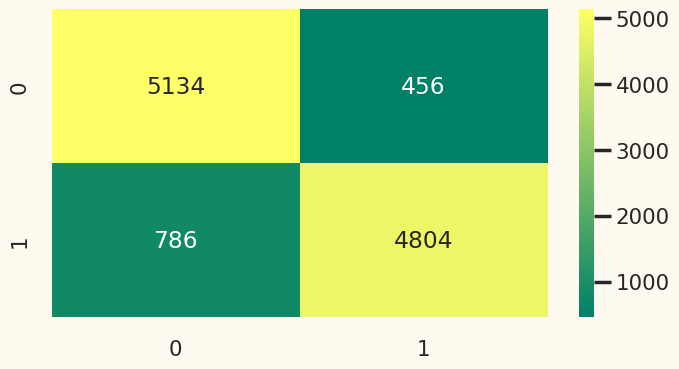

In [92]:
model_prediction(AdaBoostClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## Gradient Boost


------------------------------------------------------------------------
Mean Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 89.4281880909788
Mean Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 85.03961155123946
Mean Precision Score of GradientBoostingClassifier() model is: 0.8849244812049685
Mean Recall Score of GradientBoostingClassifier() model is: 0.8057500638895988
Mean ROC_AUC Score of GradientBoostingClassifier() model is: 0.9136466697175188
Mean f1 Score of GradientBoostingClassifier() model is: 0.841527152755835

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.94      0.90      5590
           1       0.93      0.87      0.90      5590

    accuracy                           0.90     11180
   macro avg       0.90      0.90      0.90     11180
weighted 

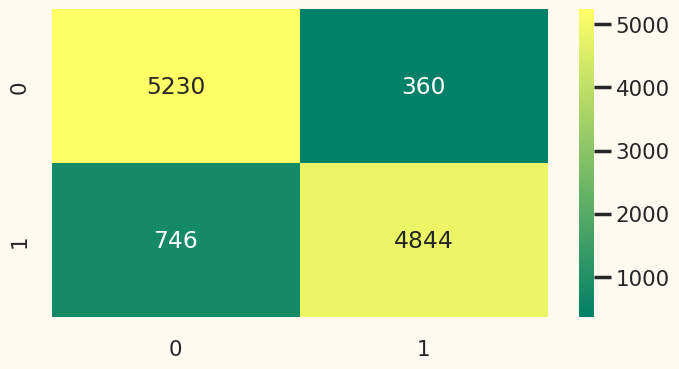

In [93]:
model_prediction(GradientBoostingClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## XG Boost


------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 90.51654740608228
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              co

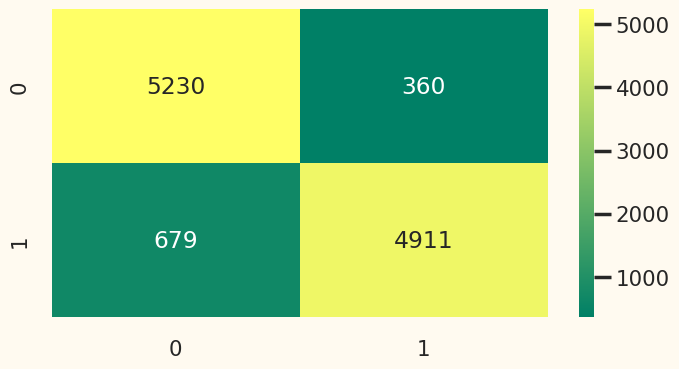

In [94]:
model_prediction(XGBClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## Cat Boost

Streaming output truncated to the last 5000 lines.
16:	learn: 0.4279771	total: 101ms	remaining: 5.86s
17:	learn: 0.4225766	total: 107ms	remaining: 5.83s
18:	learn: 0.4142304	total: 113ms	remaining: 5.82s
19:	learn: 0.4066207	total: 119ms	remaining: 5.82s
20:	learn: 0.3998444	total: 124ms	remaining: 5.79s
21:	learn: 0.3924402	total: 130ms	remaining: 5.8s
22:	learn: 0.3853309	total: 136ms	remaining: 5.77s
23:	learn: 0.3799564	total: 141ms	remaining: 5.75s
24:	learn: 0.3763534	total: 147ms	remaining: 5.73s
25:	learn: 0.3717527	total: 152ms	remaining: 5.7s
26:	learn: 0.3683331	total: 163ms	remaining: 5.88s
27:	learn: 0.3637596	total: 169ms	remaining: 5.87s
28:	learn: 0.3598437	total: 175ms	remaining: 5.86s
29:	learn: 0.3565398	total: 181ms	remaining: 5.84s
30:	learn: 0.3521221	total: 186ms	remaining: 5.82s
31:	learn: 0.3485445	total: 192ms	remaining: 5.81s
32:	learn: 0.3457374	total: 197ms	remaining: 5.78s
33:	learn: 0.3427373	total: 203ms	remaining: 5.76s
34:	learn: 0.3384123	total: 208ms

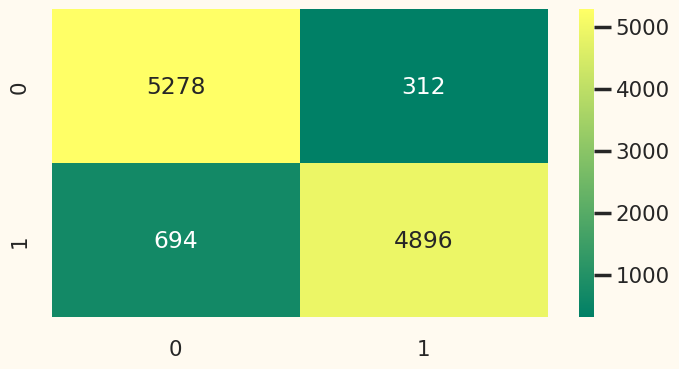

In [95]:
model_prediction(CatBoostClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## LGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4472, number of negative: 4472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 8944, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4472, number of negative: 4472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2564
[LightGBM] 

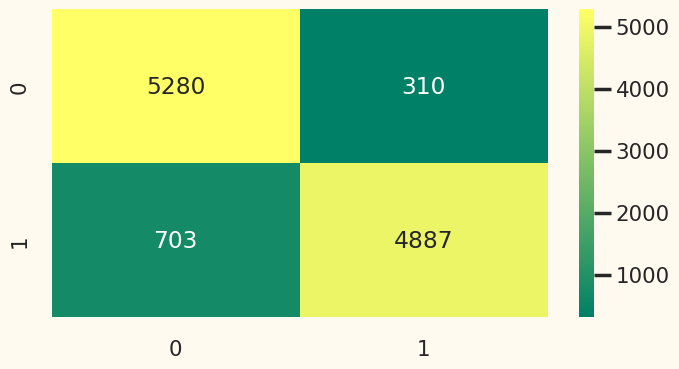

In [96]:
model_prediction(LGBMClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

# Hypertuning Selected Models

## Cat Boost

In [97]:
num_folds = 5  # Set the number of folds
RAND_VAL = 42  # Set the random state
n_est = 4000  # Set the number of iterations

folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)
test_preds = np.empty((num_folds, len(df_test_encoded)))
auc_vals = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(x_smote, y_smote)):

    X_train, y_train = x_smote.iloc[train_idx], y_smote.iloc[train_idx]
    X_val, y_val = x_smote.iloc[valid_idx], y_smote.iloc[valid_idx]

    train_pool = Pool(X_train, y_train)
    val_pool = Pool(X_val, y_val)

    clf = CatBoostClassifier(
        eval_metric='AUC',
        learning_rate=0.022,
        iterations=n_est
    )
    clf.fit(train_pool, eval_set=val_pool, verbose=300)

    y_pred_val = clf.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred_val)
    print("AUC for fold ", n_fold, ": ", auc_val)
    auc_vals.append(auc_val)

    y_pred_test = clf.predict_proba(df_test_encoded)[:, 1]
    test_preds[n_fold, :] = y_pred_test
    print("----------------")


0:	test: 0.9231545	best: 0.9231545 (0)	total: 6.53ms	remaining: 26.1s
300:	test: 0.9628817	best: 0.9629033 (295)	total: 2.34s	remaining: 28.8s
600:	test: 0.9649595	best: 0.9649899 (599)	total: 5.83s	remaining: 33s
900:	test: 0.9652643	best: 0.9654083 (747)	total: 7.56s	remaining: 26s
1200:	test: 0.9650899	best: 0.9654083 (747)	total: 9.39s	remaining: 21.9s
1500:	test: 0.9648587	best: 0.9654083 (747)	total: 11.2s	remaining: 18.6s
1800:	test: 0.9641338	best: 0.9654083 (747)	total: 12.9s	remaining: 15.8s
2100:	test: 0.9634450	best: 0.9654083 (747)	total: 14.7s	remaining: 13.3s
2400:	test: 0.9629169	best: 0.9654083 (747)	total: 17.9s	remaining: 11.9s
2700:	test: 0.9623585	best: 0.9654083 (747)	total: 22.7s	remaining: 10.9s
3000:	test: 0.9619177	best: 0.9654083 (747)	total: 26.7s	remaining: 8.9s
3300:	test: 0.9615889	best: 0.9654083 (747)	total: 32.9s	remaining: 6.97s
3600:	test: 0.9614073	best: 0.9654083 (747)	total: 35.9s	remaining: 3.98s
3900:	test: 0.9612040	best: 0.9654083 (747)	total:

In [98]:
catboost_preds = test_preds.mean(axis=0)
print("Mean AUC: ",np.mean(auc_vals))


Mean AUC:  0.9648324218112462


## XG Boost

In [101]:
num_folds = 5  # Set the number of folds
RAND_VAL = 42  # Set the random state
n_est = 4000  # Set the number of iterations

folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)
test_preds = np.empty((num_folds, len(df_test_encoded)))
auc_vals = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(x_smote, y_smote)):

    X_train, y_train = x_smote.iloc[train_idx], y_smote.iloc[train_idx]
    X_val, y_val = x_smote.iloc[valid_idx], y_smote.iloc[valid_idx]

    clf = XGBClassifier(
        learning_rate=0.022,
        n_estimators=n_est,
        eval_metric='auc'  # Specify eval_metric here
    )

    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=300)

    y_pred_val = clf.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred_val)
    print("AUC for fold ", n_fold, ": ", auc_val)
    auc_vals.append(auc_val)

    # Assuming test_df_encoded is your test data for prediction
    y_pred_test = clf.predict_proba(df_test_encoded)[:, 1]
    test_preds[n_fold, :] = y_pred_test
    print("----------------")


[0]	validation_0-auc:0.91985
[300]	validation_0-auc:0.96435
[600]	validation_0-auc:0.96431
[900]	validation_0-auc:0.96238
[1200]	validation_0-auc:0.96118
[1500]	validation_0-auc:0.96033
[1800]	validation_0-auc:0.95952
[2100]	validation_0-auc:0.95893
[2400]	validation_0-auc:0.95858
[2700]	validation_0-auc:0.95794
[3000]	validation_0-auc:0.95743
[3300]	validation_0-auc:0.95721
[3600]	validation_0-auc:0.95728
[3900]	validation_0-auc:0.95728
[3999]	validation_0-auc:0.95724
AUC for fold  0 :  0.9572430003744228
----------------
[0]	validation_0-auc:0.92422
[300]	validation_0-auc:0.96211
[600]	validation_0-auc:0.96442
[900]	validation_0-auc:0.96450
[1200]	validation_0-auc:0.96457
[1500]	validation_0-auc:0.96392
[1800]	validation_0-auc:0.96382
[2100]	validation_0-auc:0.96354
[2400]	validation_0-auc:0.96333
[2700]	validation_0-auc:0.96310
[3000]	validation_0-auc:0.96297
[3300]	validation_0-auc:0.96302
[3600]	validation_0-auc:0.96302
[3900]	validation_0-auc:0.96303
[3999]	validation_0-auc:0.963

In [102]:
xgboost_preds = test_preds.mean(axis=0)
"Mean AUC: ",np.mean(auc_vals)

('Mean AUC: ', 0.9592079998463907)

## LGBM

In [103]:
num_folds = 5  # Set the number of folds
RAND_VAL = 42  # Set the random state
n_est = 4000  # Set the number of iterations

folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)
test_preds = np.empty((num_folds, len(df_test_encoded)))
auc_vals = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(x_smote, y_smote)):

    X_train, y_train = x_smote.iloc[train_idx], y_smote.iloc[train_idx]
    X_val, y_val = x_smote.iloc[valid_idx], y_smote.iloc[valid_idx]

    clf = LGBMClassifier(
        learning_rate=0.022,
        n_estimators=n_est
    )

    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

    y_pred_val = clf.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred_val)
    print("AUC for fold ", n_fold, ": ", auc_val)
    auc_vals.append(auc_val)

    # Assuming test_df_encoded is your test data for prediction
    y_pred_test = clf.predict_proba(df_test_encoded)[:, 1]
    test_preds[n_fold, :] = y_pred_test
    print("----------------")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4472, number of negative: 4472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 8944, number of used features: 16
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
AUC for fold  0 :  0.960816817662514
----------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4472, number of negative: 4472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true`

In [104]:
lgbm_preds = test_preds.mean(axis=0)
"Mean AUC: ",np.mean(auc_vals)

('Mean AUC: ', 0.9611725192891729)

# Ensemble with Average

In [105]:
# Ensemble by averaging predictions
ensemble_preds = (catboost_preds + xgboost_preds + lgbm_preds) / 3


In [106]:
ensemble_preds = np.round(ensemble_preds)

In [107]:
ensemble_preds = ensemble_preds.astype('int')

# Submission

In [108]:
df_test = pd.read_csv('/content/test.csv')

In [109]:
# Create a submission DataFrame
submission = pd.DataFrame({'customer_id': df_test['customer_id'], 'Exited': ensemble_preds})


In [110]:
# Save the submission file
submission.to_csv('submission.csv', index=False)
submission

,customer_id,Exited
0,15782993,0
1,15640442,0
2,15606003,0
3,15672374,1
4,15630725,1
...,...,...
2995,15596647,0
2996,15681075,1
2997,15573851,1
2998,15807663,1


🎊🎉**WELL DONE**🎊🎉


---









